In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandasql as ps

- Reading the data file

In [219]:
df = pd.read_csv('./Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [220]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


- Formatting the column names by removing the spaces 

In [221]:
df.columns = [col.strip() for col in df.columns]

- We have to combine the data of two regions without their headers. At the same time, we should be able to identify which row is for which region.

    - Here, If Region = 1 => __Bejaia Region__ else if Region = 0 => __Sidi-Bel Abbes Region__ 

In [222]:
# Finding index location of rows which needs to be removd.
df.loc[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


- Dropping two rows in order to merge the data

In [223]:
df.drop([122,123],axis=0, inplace=True)

In [224]:
## Insert New Column 'Region' to store Region value
df['Region'] = np.nan

In [225]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,NaN
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,NaN
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,NaN
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,NaN
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,NaN


In [226]:
df.loc[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,NaN
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,NaN
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,NaN
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,NaN
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,NaN
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,NaN
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,NaN
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,NaN
130,07,06,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire,NaN


In [227]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,NaN
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,NaN
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,NaN
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,NaN
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,NaN


In [228]:
# Adding values in "Region"
for i in range(df.shape[0]):
    if i <=121:
        df['Region'].iloc[i] = 1
    else:
        df['Region'].iloc[i] = 0
        

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [229]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [230]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,0.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,0.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0.0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,0.0


In [231]:
df['Region'].value_counts()

1.0    122
0.0    122
Name: Region, dtype: int64

- Shape of the dataset

In [232]:
df.shape

(244, 15)

- Columns in the dataset

In [233]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

- Basic descriptive statistics and information

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.6+ KB


In [235]:
df.describe()

,Region
count,244.000000
mean,0.500000
std,0.501028
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


- Finding data types of the columns

In [236]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [237]:
# df.columns[:-2].apply(float)

In [238]:
# np.vectorize(map)(*df.columns[:-2])
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


- Changing data type of columns from Obj to int/float based on their values

In [239]:
for col in df.columns:
    if col in (df.columns[0:6]):
        df[col] = df[col].apply(int)
    elif col in (df.columns[6:12]):
        df[col] = df[col].apply(lambda x : x.replace(' ',''))
        df[col] = df[col].apply(float)

In [240]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI             object
Classes         object
Region         float64
dtype: object

- Column 'FWI' has float values except one row, where the value is 'fire'.
- This may has occured due to some error while entering the data

In [241]:
df.iloc[164:166]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
166,13,7,2012,39,45,13,0.6,85.2,11.3,10.40,4.2,10.9,4.7,fire,0.0
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,NaN,0.0


In [242]:
df['Classes'].fillna('fire', inplace=True)


In [243]:
df.at[167, 'FWI'] = np.nan

In [244]:
df.loc[167]

day               14
month              7
year            2012
Temperature       37
RH                37
Ws                18
Rain             0.2
FFMC            88.9
DMC             12.9
DC             14.69
ISI             12.5
BUI             10.4
FWI              NaN
Classes         fire
Region           0.0
Name: 167, dtype: object

In [245]:
df['FWI'] = df['FWI'].apply(float)

In [246]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region         float64
dtype: object

- NOW THE DATA TYPES OF ALL COLUMNS ARE SORTED

- Checking if any NULL values are present in the datas set

In [247]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        0
Region         0
dtype: int64

- Only one NULL value is present in the FWI feature.

- Basic stats of the Data

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 38.6+ KB


In [249]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


- Standard deviation of year is 0. It means this data is for the year 2012 ONLY. So, while training our model we can remove this feature

- Adding a new feature "date" from three features (day, month, year)

In [250]:
df['date'] = pd.to_datetime(df[['year','day','month']])

In [251]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1.0,2012-09-28
77,17,8,2012,37,52,18,0.0,89.3,16.0,100.7,9.7,22.9,14.6,fire,1.0,2012-08-17
29,30,6,2012,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,fire,1.0,2012-06-30
86,26,8,2012,31,78,18,0.0,85.8,45.6,190.6,4.7,57.1,13.7,fire,1.0,2012-08-26
139,16,6,2012,29,87,15,0.4,47.4,4.2,8.0,0.2,4.1,0.1,not fire,0.0,2012-06-16


## EXPLORING DATA

In [252]:
numerical_features = df[df.columns[:-2]]

numerical_features.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [253]:
categorical =  [feat for feat in df.columns if df[feat].dtype == 'O']
categorical_features = df[categorical]

categorical_features.head()

,Classes
0,not fire
1,not fire
2,not fire
3,not fire
4,not fire


- Information about data:
    1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
        Weather data observations
    2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
    3. RH : Relative Humidity in %: 21 to 90
    4. Ws :Wind speed in km/h: 6 to 29
    5. Rain: total day in mm: 0 to 16.8
        FWI Components
    6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
    7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
    8. Drought Code (DC) index from the FWI system: 7 to 220.4
    9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
    10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
    11. Fire Weather Index (FWI) Index: 0 to 31.1
    12. Classes: two classes(fire and no fire)
    13. Region : two regions ( Region = 1 => __Bejaia Region__ ; Region = 0 => __Sidi-Bel Abbes Region__ )

- Changing Classes(fire/no fire) into Numerical Feauture

In [254]:
# removing extra trailing spaces in the strings
df['Classes'] = df['Classes'].apply(lambda x : x.strip())

In [255]:
# verifying 
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [256]:
# replacing categorical value with Numerical Value 
myDict = {'fire':1, 'not fire':0}
df['Classes']  = df['Classes'].map(myDict)

In [257]:
df['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

## Finding distributions of Numerical Features

In [258]:
numerical_features.columns[3:-1]

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [259]:
# plt.figure(figsize=(8,4), dpi=100)
# for feat in numerical_features.columns[3:-1]:
    
#     sns.displot(x=feat,data=df,bins=40, edgecolor='black',kde=True,rug=True)

#     # plt.tight_layout()

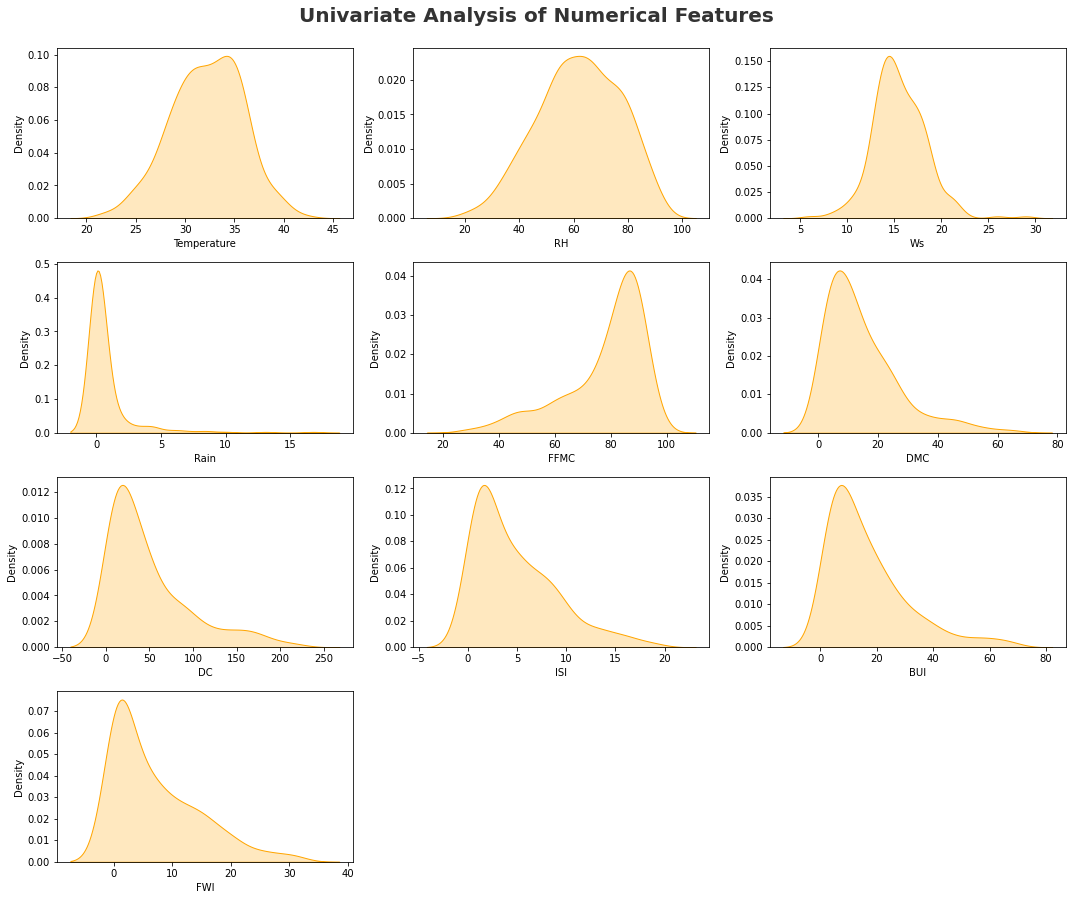

In [260]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features.columns[3:-1])):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features.columns[3:-1][i]],shade=True, color='orange')
    plt.xlabel(numerical_features.columns[3:-1][i])
    plt.tight_layout()

<AxesSubplot:xlabel='Classes', ylabel='count'>

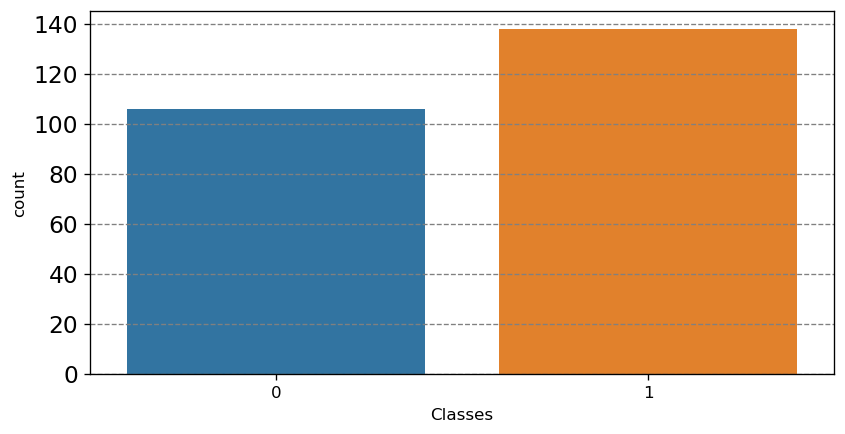

In [261]:
plt.figure(figsize=(8,4),dpi=120)
plt.yticks(fontsize=14)
plt.xticks( rotation=0)

axes = plt.gca()
axes.grid(color='grey', linestyle='--')

sns.countplot(data=df, x='Classes')

Observation :
- Almost 140 fire incidents occured out of total 244 days

In [262]:
fires_per_week = df[df['Classes']==1]

fires_per_week.shape

(138, 16)

## Which month has seen most number of fire incidents ?

In [263]:
df.groupby(['month','Classes']).aggregate({'day':'count'})

day
month Classes     
6     0         35
      1         25
7     0         23
      1         39
8     0         11
      1         51
9     0         37
      1         23

Observation:
- __August__ month has seen most number of fires (51) and its very next month __September__ has seen least(23).

## Which region has most fire incidents ? Region 1 or 0 ?

In [264]:
df.groupby(['Region', 'Classes']).count()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC  DC  \
Region Classes                                                               
0.0    0         43     43    43           43  43  43    43    43   43  43   
       1         79     79    79           79  79  79    79    79   79  79   
1.0    0         63     63    63           63  63  63    63    63   63  63   
       1         59     59    59           59  59  59    59    59   59  59   

                ISI  BUI  FWI  date  
Region Classes                       
0.0    0         43   43   43    43  
       1         79   79   78    79  
1.0    0         63   63   63    63  
       1         59   59   59    59

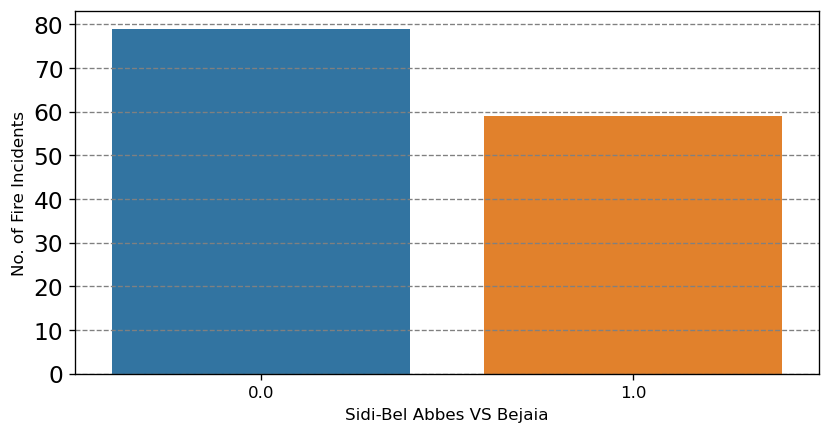

In [265]:
plt.figure(figsize=(8,4),dpi=120)
plt.yticks(fontsize=14)
plt.xticks( rotation=0)

axes = plt.gca()
axes.grid(color='grey', linestyle='--')



ax = sns.countplot(data=df[df['Classes'] == 1], x='Region')

ax.set(xlabel='Sidi-Bel Abbes VS Bejaia', ylabel='No. of Fire Incidents')
plt.show()

Observation :
- Sidi-Bel Abbes Region has more fire incidents(79), when compared to Bejaia Region(59)

In [266]:
# px.line(data_frame=fires_per_week,x='day',y='Classes', color='Region', title='Births for each clinic over the years')

/Users/mohdhaseeb/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



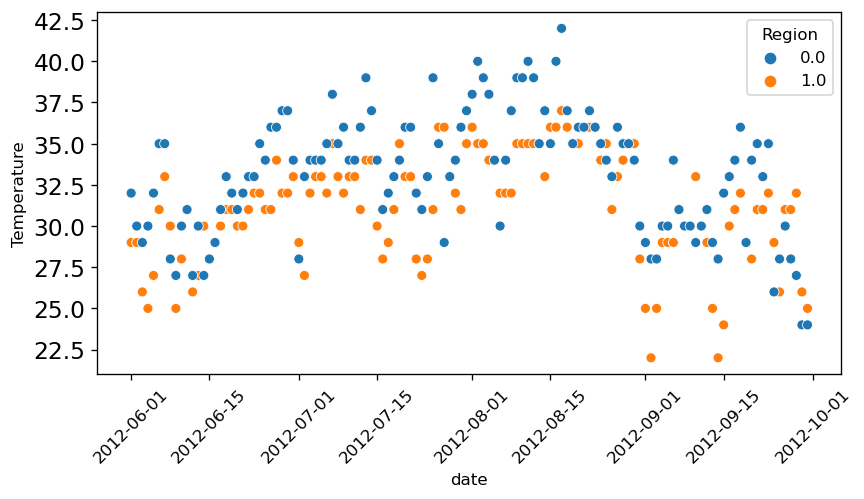

In [267]:
plt.figure(figsize=(8,4),dpi=120)
plt.yticks(fontsize=14)
plt.xticks( rotation=45)

sns.scatterplot(df['date'], df['Temperature'], hue='Region', data=df)
 
plt.show()

## Highest temparature when fire incident occured or didn't occur

In [268]:
df.query('Classes == 1')['Temperature'].max()

42

In [269]:
df.query('Classes == 1')['Temperature'].min()

26

In [270]:
df.query('Classes == 0')['Temperature'].max()

39

In [271]:
df.query('Classes == 0')['Temperature'].min()

22

In [272]:
px.box(data_frame=df,y='Temperature',x='Classes', points='all')

- Finding correlation between all the features

<AxesSubplot:>

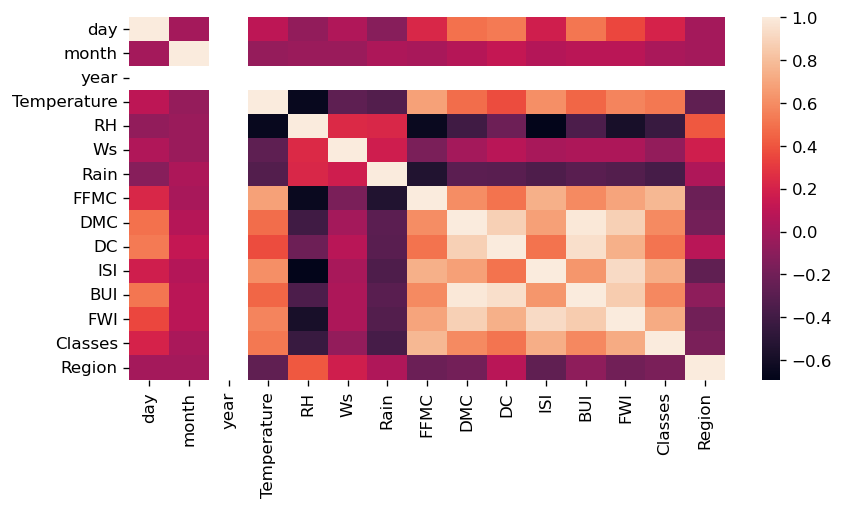

In [273]:
plt.figure(figsize=(8,4),dpi=120)

sns.heatmap(df.corr(), annot=False)

In [274]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350781,0.201784,-4.662229e-16
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.082639,0.022333,6.718556e-17
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.566670,0.518119,-2.734961e-01
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.580957,-0.435023,4.064239e-01
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032368,-0.066529,1.768290e-01
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324422,-0.379449,4.108006e-02
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.691132,0.770114,-2.246798e-01
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875864,0.584188,-1.910937e-01
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739521,0.507132,8.148217e-02


- Top 10 days with High Temperature

In [275]:
top_10_heat = df.sort_values(by=['Temperature'],ascending=False)[:10]
top_10_heat

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
201,17,8,2012,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,24.0,1,0.0,2012-08-17
195,11,8,2012,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,21.6,1,0.0,2012-08-11
200,16,8,2012,40,41,10,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1,0.0,2012-08-16
186,2,8,2012,40,34,14,0.0,93.3,10.8,21.4,13.8,10.6,13.5,1,0.0,2012-08-02
193,9,8,2012,39,43,12,0.0,91.7,16.5,30.9,9.6,16.4,12.7,1,0.0,2012-08-09
178,25,7,2012,39,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,0,0.0,2012-07-25
196,12,8,2012,39,21,17,0.4,93.0,18.4,41.5,15.5,18.4,18.8,1,0.0,2012-08-12
187,3,8,2012,39,33,17,0.0,93.7,17.1,32.1,17.2,16.9,19.5,1,0.0,2012-08-03
194,10,8,2012,39,39,15,0.2,89.3,15.8,35.4,8.2,15.8,10.7,1,0.0,2012-08-10
166,13,7,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,1,0.0,2012-07-13


<AxesSubplot:xlabel='Temperature', ylabel='count'>

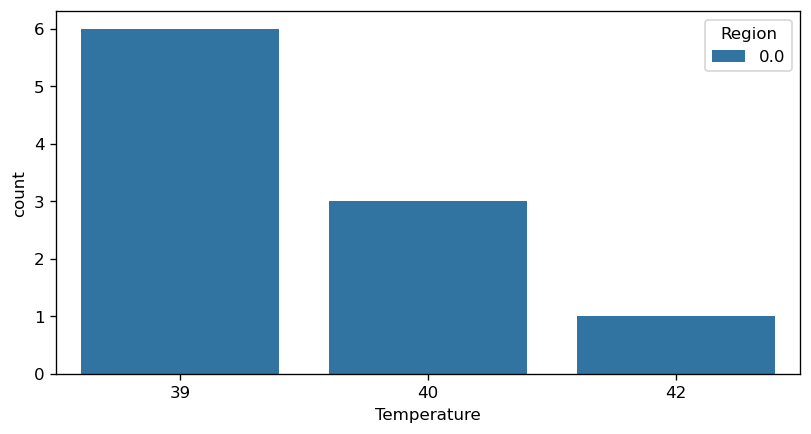

In [276]:
plt.figure(figsize=(8,4),dpi=120)

sns.countplot(data=top_10_heat, x='Temperature', hue='Region')

Observation :
- Top 10 days with respect to temperature were all from __Sidi-Bel Abbes Region__

![TExt]('./fwi_structure.gif)

## Fine Fuel Moisture Code (FFMC)
- The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel.
- So, higher the FFMC, more chances of Fire?
- Also, FFMC is derived form Temperature, Relative Humidy, Wind Speed and Rain 

| Hazard Rating |	FFMC Fine Fuel Moisture Code 	| FWI Fire Weather Index |
| ------- | -------- | ------|
| Low| 	0-76 |	0-4 |
| Moderate |	77-84	| 5-10 |
| High	| 85-88 |	11-18 |
| Very High |	89-91 |	19-29 |

In [277]:
df['FFMC'].max()

96.0

In [278]:
df['FFMC'].min()

28.6

In [279]:
def fwi_hazard_rating(ffmc_index):
    if ffmc_index<=4:
        return 'Low'
    elif ffmc_index <= 10 and ffmc_index>=5:
        return 'Moderate'
    elif ffmc_index <= 18 and ffmc_index>=11:
        return 'High'
    else:
        return 'Very High'

df['FWI_hazard'] = df['FWI'].apply(fwi_hazard_rating)

In [280]:
def ffmc_hazard_rating(ffmc_index):
    if ffmc_index<=76:
        return 'Low'
    elif ffmc_index <= 84 and ffmc_index>=77:
        return 'Moderate'
    elif ffmc_index <= 88 and ffmc_index>=85:
        return 'High'
    else:
        return 'Very High'

df['FFMC_hazard'] = df['FFMC'].apply(ffmc_hazard_rating)

In [281]:
df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date,FWI_hazard,FFMC_hazard
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0,2012-06-03,Low,Low
139,16,6,2012,29,87,15,0.4,47.4,4.2,8.0,0.2,4.1,0.1,0,0.0,2012-06-16,Low,Low
77,17,8,2012,37,52,18,0.0,89.3,16.0,100.7,9.7,22.9,14.6,1,1.0,2012-08-17,High,Very High
162,9,7,2012,36,43,15,1.9,82.3,9.4,9.9,3.2,9.0,3.1,1,0.0,2012-07-09,Low,Moderate
150,27,6,2012,36,55,15,0.0,89.1,20.9,43.3,8.0,20.8,12.0,1,0.0,2012-06-27,High,Very High
26,27,6,2012,34,53,18,0.0,89.0,21.6,80.3,9.2,25.8,15.0,1,1.0,2012-06-27,High,Very High
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0,2012-06-01,Low,Low
56,27,7,2012,36,48,13,0.0,90.3,22.2,108.5,8.7,29.4,15.3,1,1.0,2012-07-27,High,Very High
196,12,8,2012,39,21,17,0.4,93.0,18.4,41.5,15.5,18.4,18.8,1,0.0,2012-08-12,Very High,Very High
234,19,9,2012,29,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,1,0.0,2012-09-19,Moderate,Moderate


In [282]:
df['FFMC_hazard'].value_counts()

Very High    77
Low          76
Moderate     51
High         40
Name: FFMC_hazard, dtype: int64

<AxesSubplot:xlabel='FFMC_hazard', ylabel='count'>

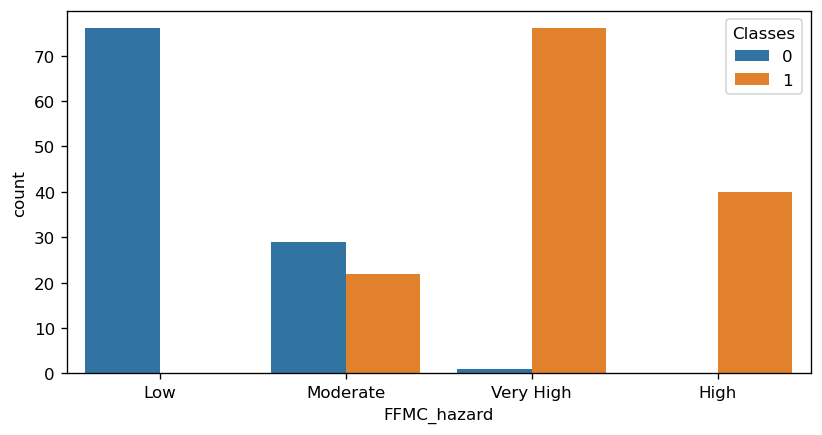

In [283]:
plt.figure(figsize=(8,4),dpi=120)
# sns.color_palette("Paired")
sns.countplot(data=df, x='FFMC_hazard', hue='Classes')

Observation :
- We can clearly conclude that, whenever FFMC rating is either __Very High__ OR __High__, there is 100% chance of fire that day. 50% chance when it is __MODERATE__ and 0% when it is __LOW__.

## Duff Moisture Code
- The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.

## Drought Code
- The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

## Initial Spread Index (ISI)
- The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It is based on wind speed and FFMC. Like the rest of the FWI system components, ISI does not take fuel type into account. Actual spread rates vary between fuel types at the same ISI.

## Buildup Index (BUI)
- The Buildup Index (BUI) is a numeric rating of the total amount of fuel available for combustion. It is based on the DMC and the DC. The BUI is generally less than twice the DMC value, and moisture in the DMC layer is expected to help prevent burning in material deeper down in the available fuel.

# Fire Weather Index
- The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and is used as a general index of fire danger throughout the forested areas of Canada.
- The Fire Weather Index (FWI) is a meteorologically based index used worldwide to estimate fire danger.

- The higher the FWI is, the more favourable the meteorological conditions to trigger a wildfire are.

In [284]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date,FWI_hazard,FFMC_hazard
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0,2012-06-01,Low,Low
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0,2012-06-02,Low,Low
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0,2012-06-03,Low,Low
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1.0,2012-06-04,Low,Low
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1.0,2012-06-05,Low,Low


In [285]:
df['FWI_hazard'].value_counts()

Low          118
Moderate      47
Very High     42
High          37
Name: FWI_hazard, dtype: int64

<AxesSubplot:xlabel='FWI_hazard', ylabel='count'>

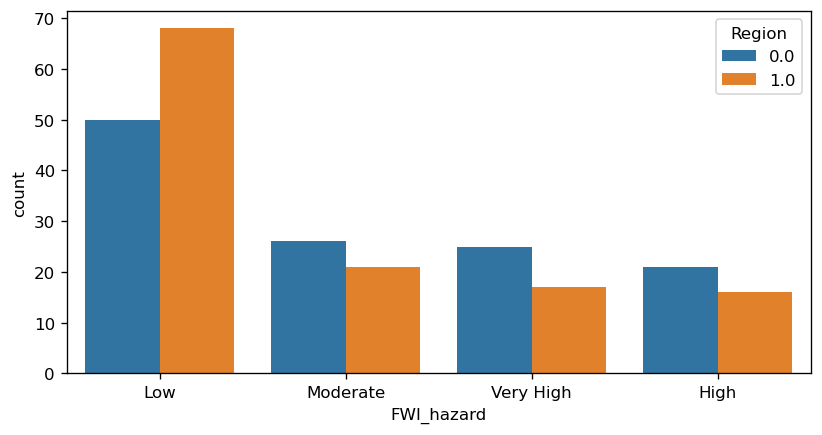

In [286]:
plt.figure(figsize=(8,4),dpi=120)
# sns.color_palette("Paired")
sns.countplot(data=df, x='FWI_hazard', hue='Region')

<Figure size 800x400 with 0 Axes>

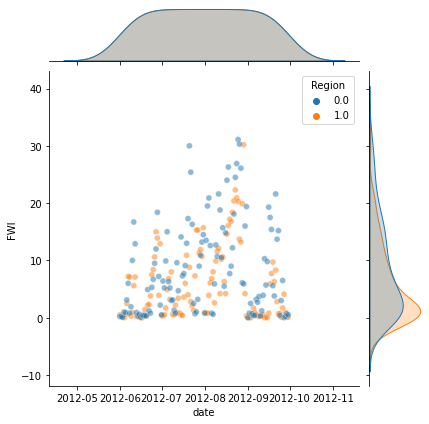

In [287]:
plt.figure(figsize=(8,4), dpi=100)

sns.jointplot(data=df,x='date',y='FWI',hue='Region',alpha=0.5)

Observation :
- We can say, FWI was very high during __AUGUST__

In [288]:
# df[df['FWI_hazard'] == 'Very High']

In [289]:
x_scaled = df[df.columns[3:-5]]

x_scaled

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
241,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
242,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
243,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [290]:
from sklearn import preprocessing

min_max = preprocessing.MinMaxScaler()


In [291]:
df_normalized = min_max.fit_transform(x_scaled)

<AxesSubplot:xlabel='BUI', ylabel='Density'>

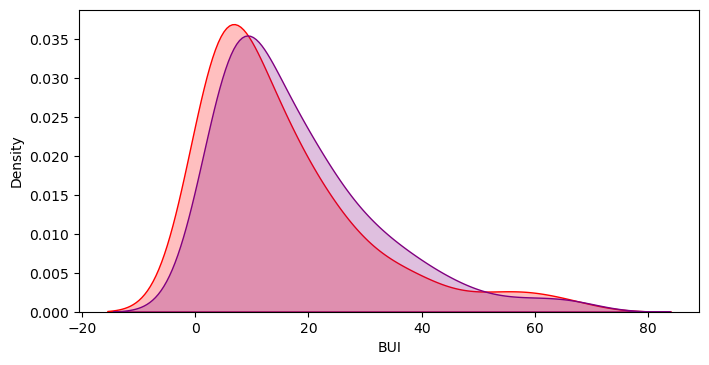

In [292]:
plt.figure(figsize=(8,4), dpi=100)

sns.kdeplot(data=df.query('Region == 1'), x='BUI', color='red', shade=True)
sns.kdeplot(data=df.query('Region != 1'), x='BUI', color='purple', shade=True)

<AxesSubplot:xlabel='ISI', ylabel='Density'>

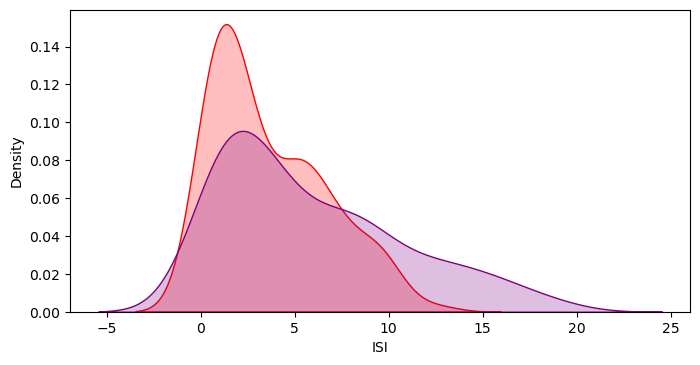

In [293]:
plt.figure(figsize=(8,4), dpi=100)

sns.kdeplot(data=df.query('Region == 1'), x='ISI', color='red', shade=True)
sns.kdeplot(data=df.query('Region != 1'), x='ISI', color='purple', shade=True)

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

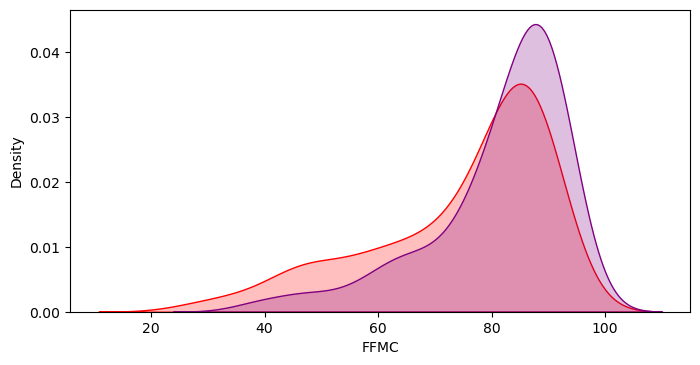

In [294]:
plt.figure(figsize=(8,4), dpi=100)

sns.kdeplot(data=df.query('Region == 1'), x='FFMC', color='red', shade=True)
sns.kdeplot(data=df.query('Region != 1'), x='FFMC', color='purple', shade=True)

<AxesSubplot:xlabel='Ws', ylabel='Density'>

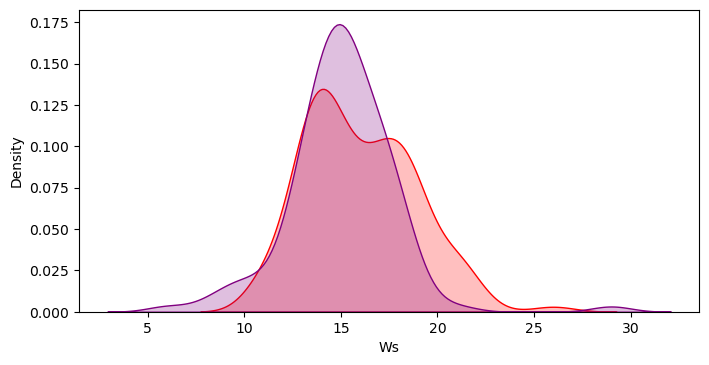

In [295]:
plt.figure(figsize=(8,4), dpi=100)

sns.kdeplot(data=df.query('Region == 1'), x='Ws', color='red', shade=True)
sns.kdeplot(data=df.query('Region != 1'), x='Ws', color='purple', shade=True)

<AxesSubplot:xlabel='RH', ylabel='Density'>

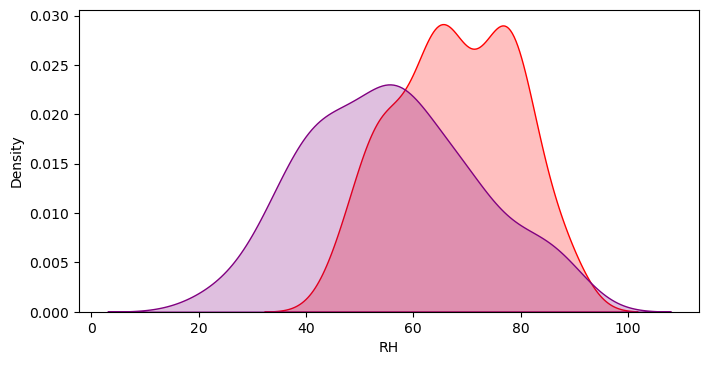

In [296]:
plt.figure(figsize=(8,4), dpi=100)

sns.kdeplot(data=df.query('Region == 1'), x='RH', color='red', shade=True)
sns.kdeplot(data=df.query('Region != 1'), x='RH', color='purple', shade=True)

<AxesSubplot:xlabel='DC', ylabel='Density'>

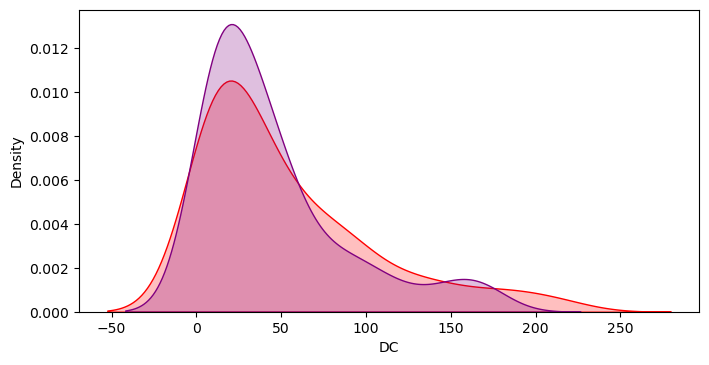

In [297]:
plt.figure(figsize=(8,4), dpi=100)

sns.kdeplot(data=df.query('Region == 1'), x='DC', color='red', shade=True)
sns.kdeplot(data=df.query('Region != 1'), x='DC', color='purple', shade=True)

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

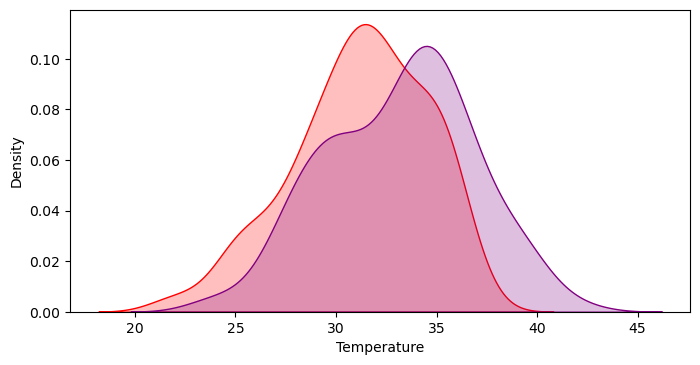

In [298]:
plt.figure(figsize=(8,4), dpi=100)

sns.kdeplot(data=df.query('Region == 1'), x='Temperature', color='red', shade=True)
sns.kdeplot(data=df.query('Region != 1'), x='Temperature', color='purple', shade=True)

<AxesSubplot:xlabel='DMC', ylabel='Density'>

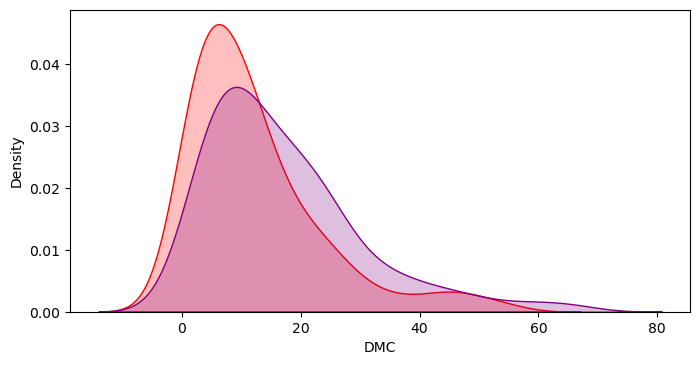

In [299]:
plt.figure(figsize=(8,4), dpi=100)

sns.kdeplot(data=df.query('Region == 1'), x='DMC', color='red', shade=True)
sns.kdeplot(data=df.query('Region != 1'), x='DMC', color='purple', shade=True)

<AxesSubplot:xlabel='FWI', ylabel='Density'>

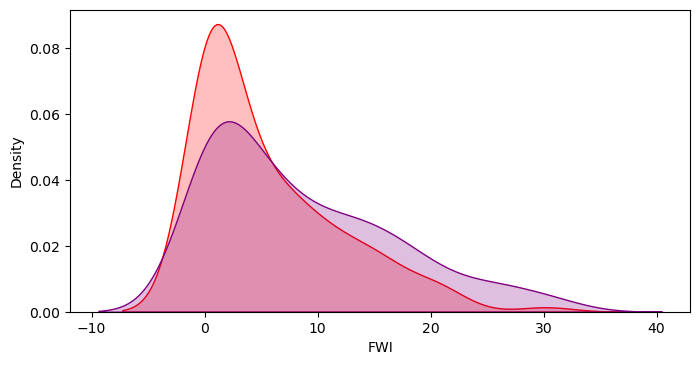

In [300]:
plt.figure(figsize=(8,4), dpi=100)

sns.kdeplot(data=df.query('Region == 1'), x='FWI', color='red', shade=True)
sns.kdeplot(data=df.query('Region != 1'), x='FWI', color='purple', shade=True)

Observation on Distrbutions :


| __FEATURE__ | __Distribution__ | 
| --------- | ------- | 
| Temperature | Normal Distribution | 
 | RH | Normal Distribution | 
 | Ws | Normal Distribution | 
 | Rain | Normal Distribution | 
 | FFMC   | Left Skewed | 
 | DMC | Log Normal / Right Skewed Distribution |
 | DC | Log Normal / Right Skewed Distribution |
 | ISI  | Log Normal / Right Skewed Distribution |
 | BUI | Log Normal / Right Skewed Distribution  |
 | FWI | Log Normal Distribution|

## Rain at times of Fire

In [301]:
df[df['Classes']==1]['RH'].max()

88

In [302]:
df[df['Classes']==1]['RH'].min()

21

In [303]:
df[df['Classes']==0]['RH'].min()

42

In [304]:
df[df['Classes']==0]['RH'].max()

90

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

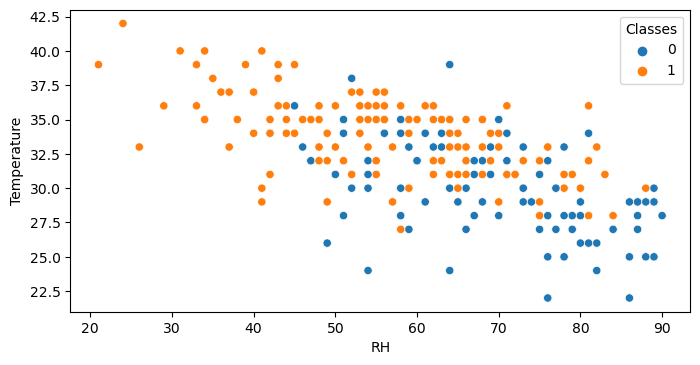

In [305]:
plt.figure(figsize=(8,4), dpi=100)

sns.scatterplot(data=df, x='RH', y='Temperature', hue='Classes')

Observation
- As RH increases, it is obvious that temperature decreases. Also, Fire is emerged at times of Low Rain. But there are instances, even at high value of RH fire is caused.

## Time Series

In [306]:
date_temp = df.sort_values(by='date').groupby(['date']).aggregate({'Temperature' : 'mean'})

date_temp.head()

,Temperature
date,
2012-06-01,30.5
2012-06-02,29.5
2012-06-03,27.5
2012-06-04,27.5
2012-06-05,29.5


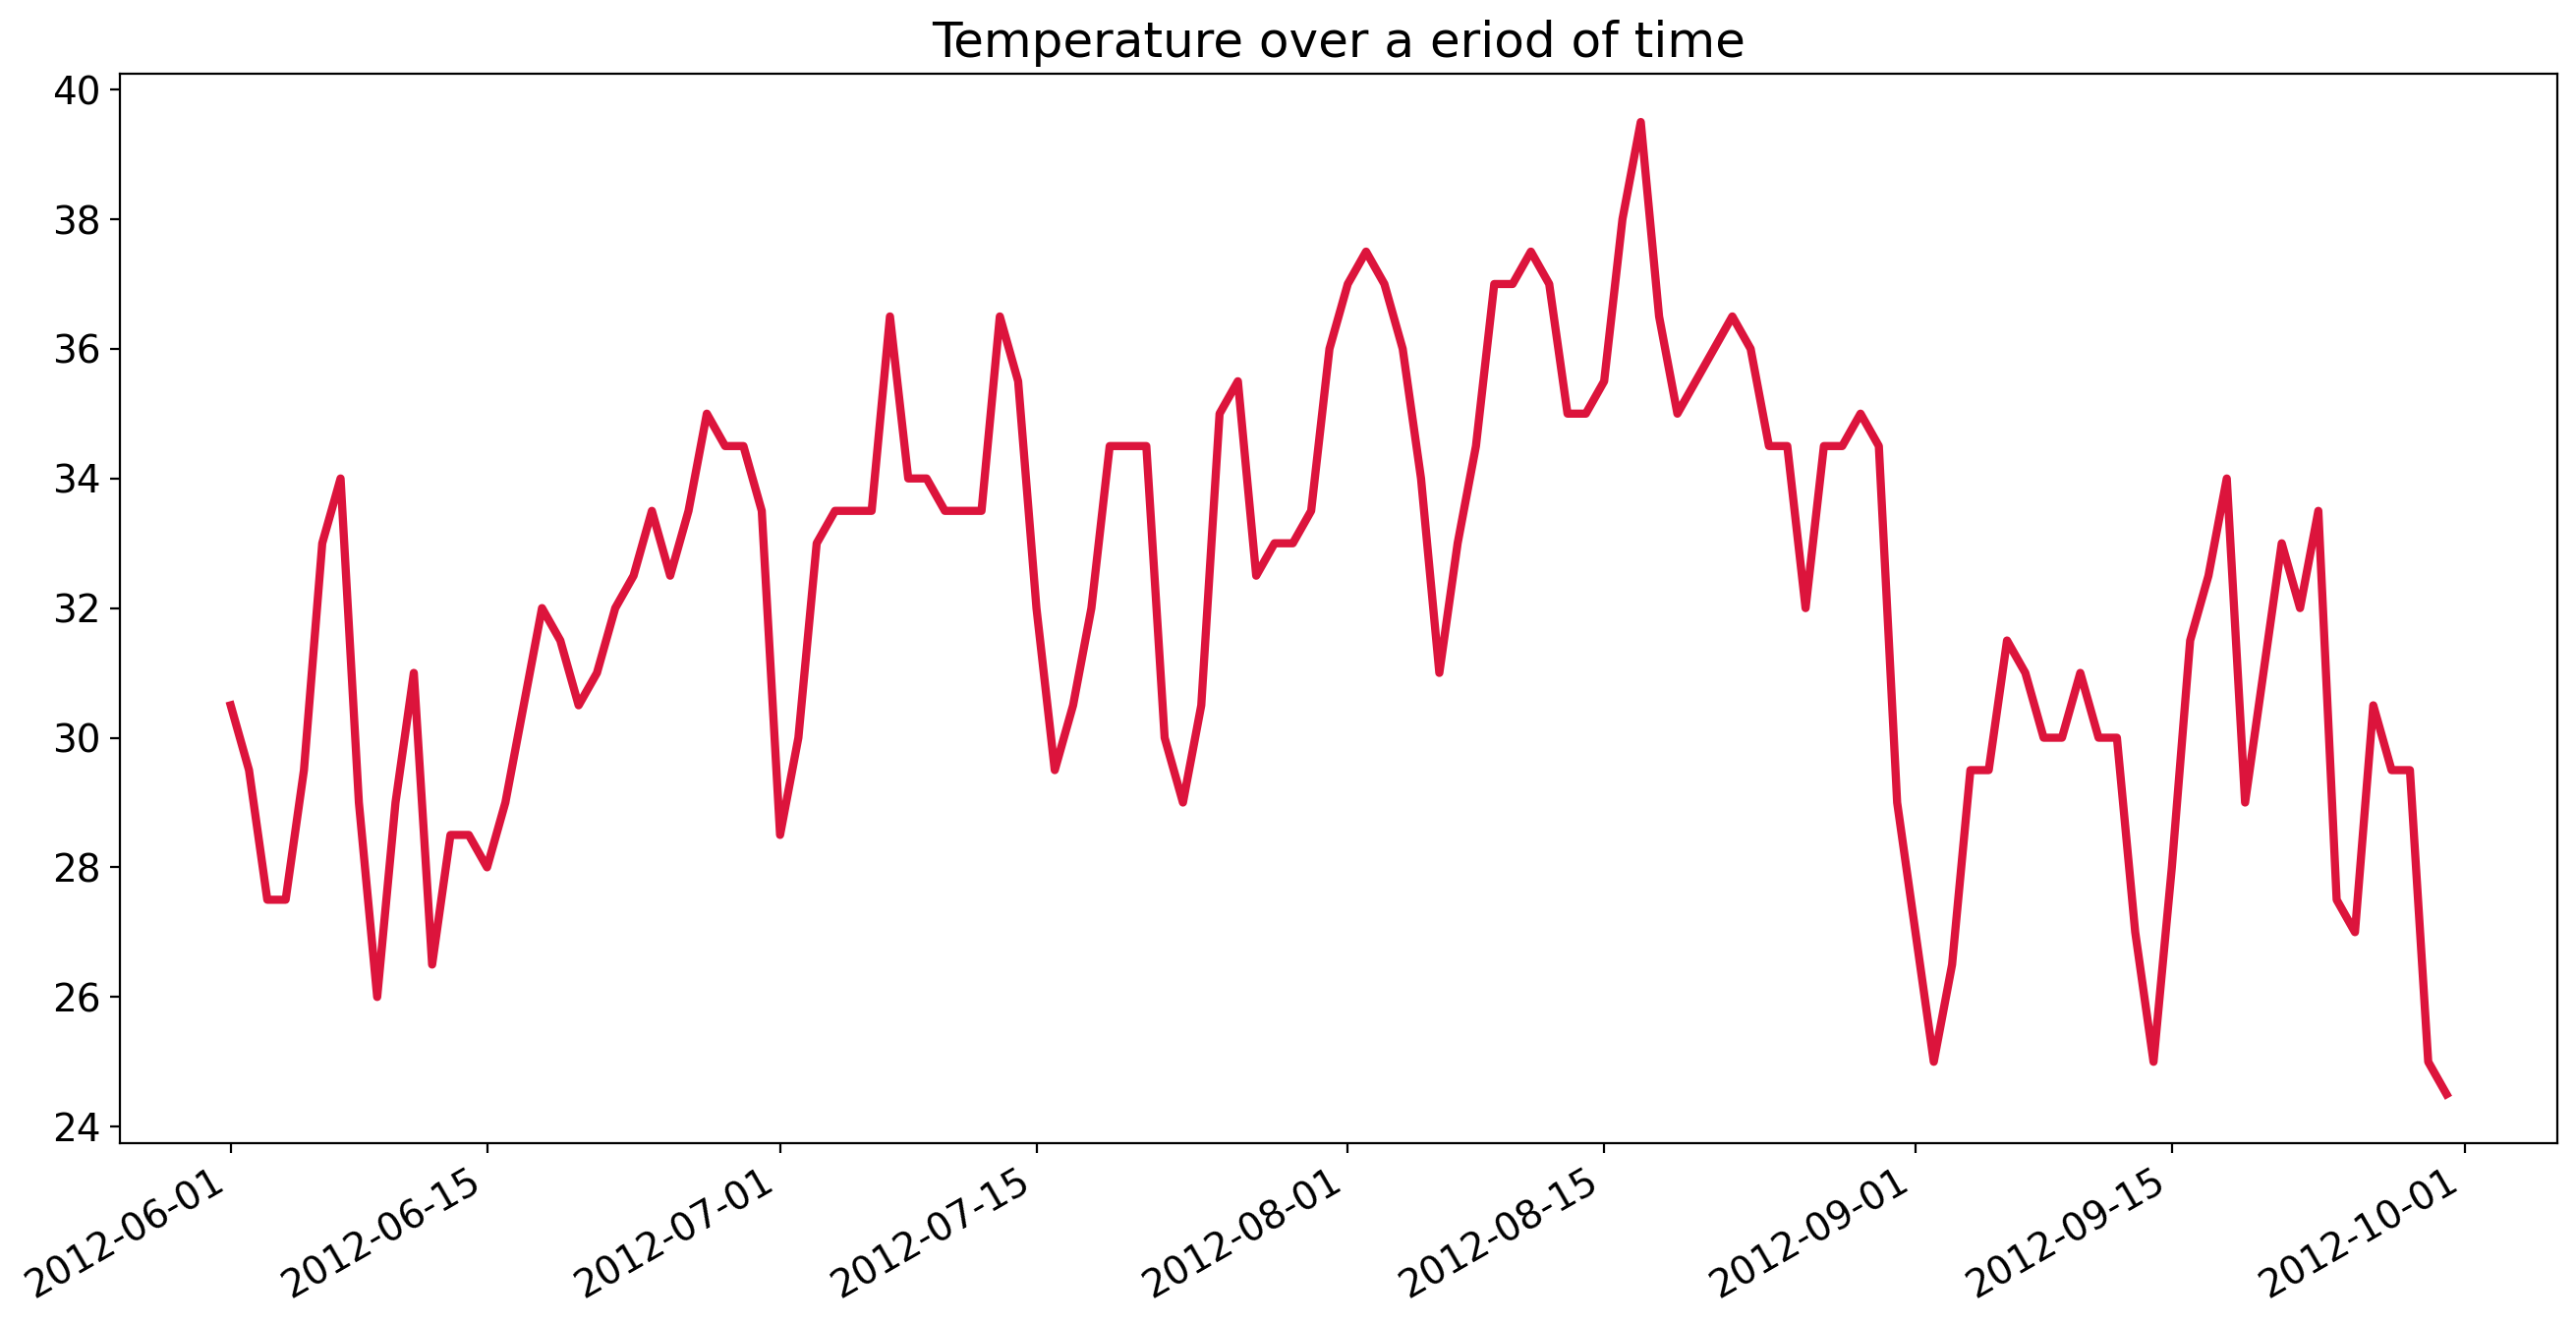

In [307]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Temperature over a eriod of time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks( 
           fontsize=14, 
           rotation=45)



ax = plt.gca() # get current axis
ax.plot(date_temp.index, date_temp.values, c='crimson', linewidth=3)



plt.gcf().autofmt_xdate()

# plt.plot(date_temp.index, date_temp.values)

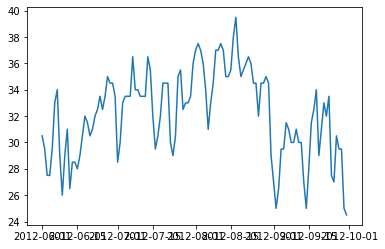

In [308]:
plt.plot(date_temp.index, date_temp.values)

In [309]:
date_temp_region = df.sort_values(by='date').groupby(['date','Region','Classes']).aggregate({'Temperature' : 'mean'}).reset_index()

date_temp_region.head()

,date,Region,Classes,Temperature
0,2012-06-01,0.0,0,32.0
1,2012-06-01,1.0,0,29.0
2,2012-06-02,0.0,0,30.0
3,2012-06-02,1.0,0,29.0
4,2012-06-03,0.0,0,29.0


<AxesSubplot:title={'center':'Temperature with respect to Region'}, xlabel='date', ylabel='Temperature'>

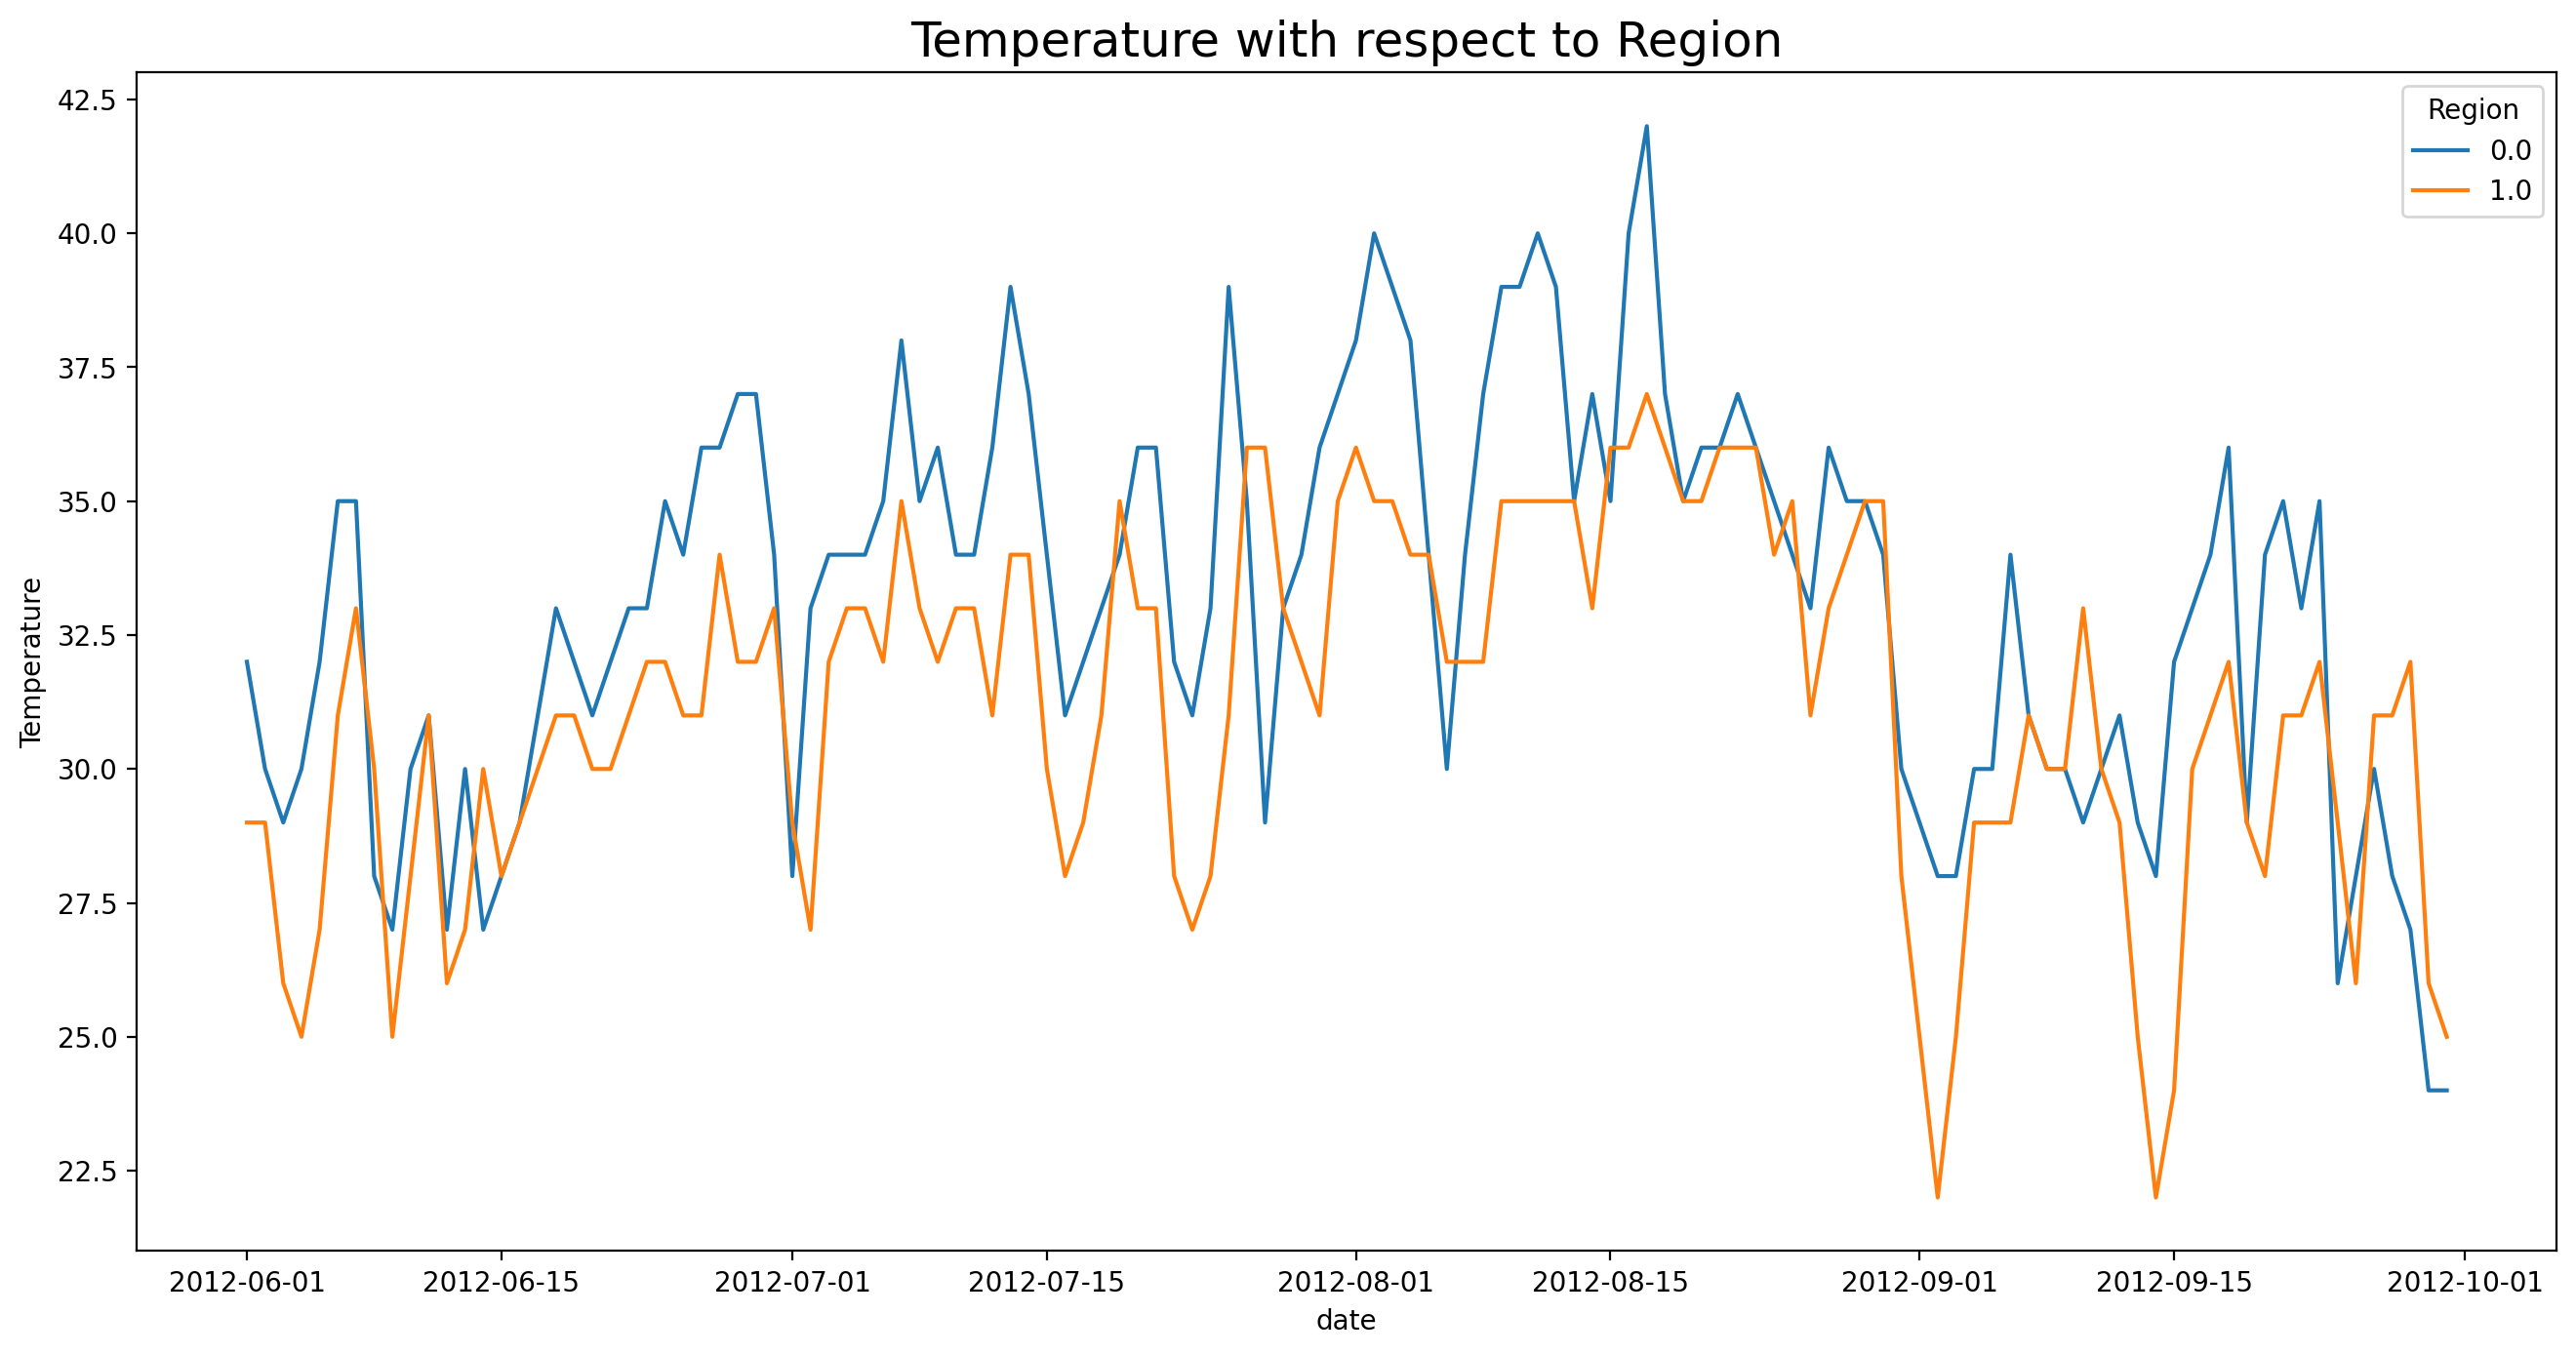

In [310]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Temperature with respect to Region', fontsize=18)

sns.lineplot(data=date_temp_region, x="date", y="Temperature", hue="Region")

Observation :
- We can see, Temperature was at peak in __AUGUST__, especially in the last weeks of it.
- We can see in above graph, Temperature in Region 0 was little higher than Region 1.
- Temperature was comparatively low in September, especially for Region 1. But for Region 0, It is same as it was in __JUNE__

## How many fire incidents we had in August

In [ ]:
# query = """
#     SELECT COUNT(classes) FROM df
#     WHERE date BETWEEN 2012-08-01 AND 2012-08-31
# """
# ps.sqldf(query=query)

In [321]:
aug_fire = df[(df['date'] > '2012-8-1') & (df['date'] <= '2012-8-31')]
aug_fire.sample(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date,FWI_hazard,FFMC_hazard
81,21,8,2012,36,58,19,0.0,88.6,29.6,141.1,9.2,38.8,18.4,1,1.0,2012-08-21,Very High,Very High
192,8,8,2012,37,56,11,0.0,87.4,11.2,20.2,5.2,11.0,5.9,1,0.0,2012-08-08,Moderate,High
91,31,8,2012,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,0,1.0,2012-08-31,Low,Low


<AxesSubplot:title={'center':'Fire incidents in Months for Sidi-Bel Abbes Region'}, xlabel='Classes', ylabel='count'>

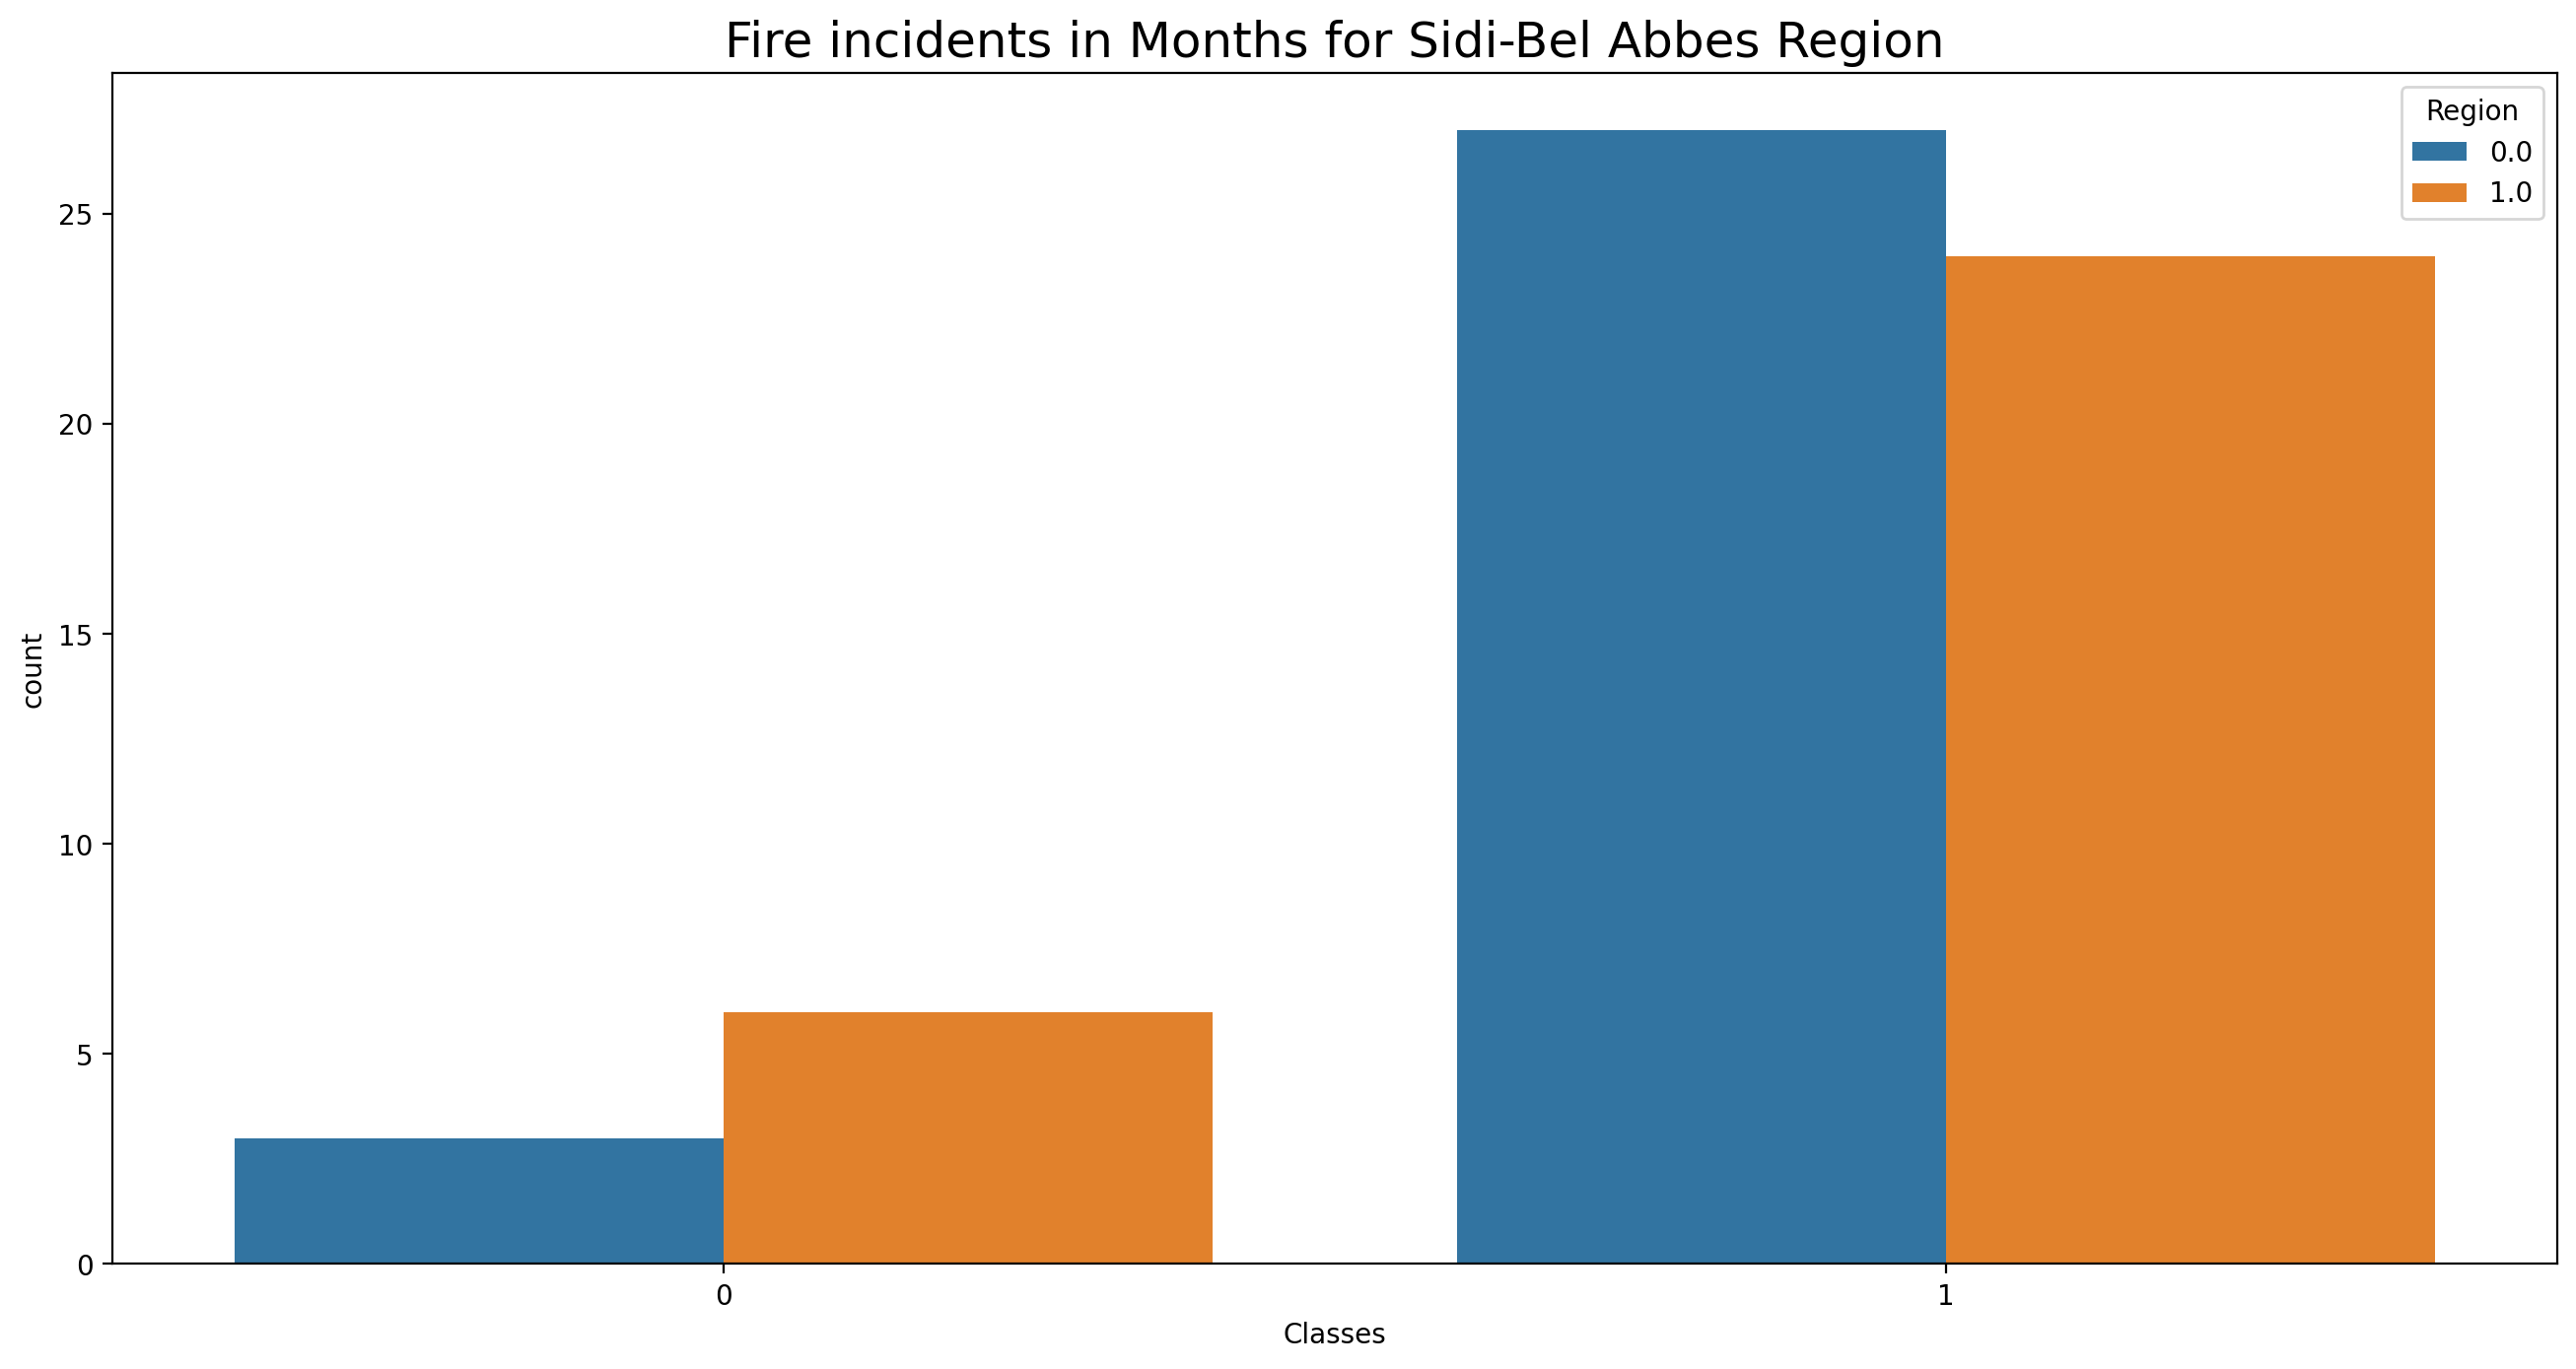

In [344]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Fire incidents in Months for Sidi-Bel Abbes Region', fontsize=18)
sns.countplot(x=aug_fire['Classes'], hue=df['Region'])

In [328]:
sep_fire = df[(df['date'] > '2012-9-1') & (df['date'] <= '2012-9-30')]


<AxesSubplot:title={'center':'Fire incidents in Month of September'}, xlabel='Classes', ylabel='count'>

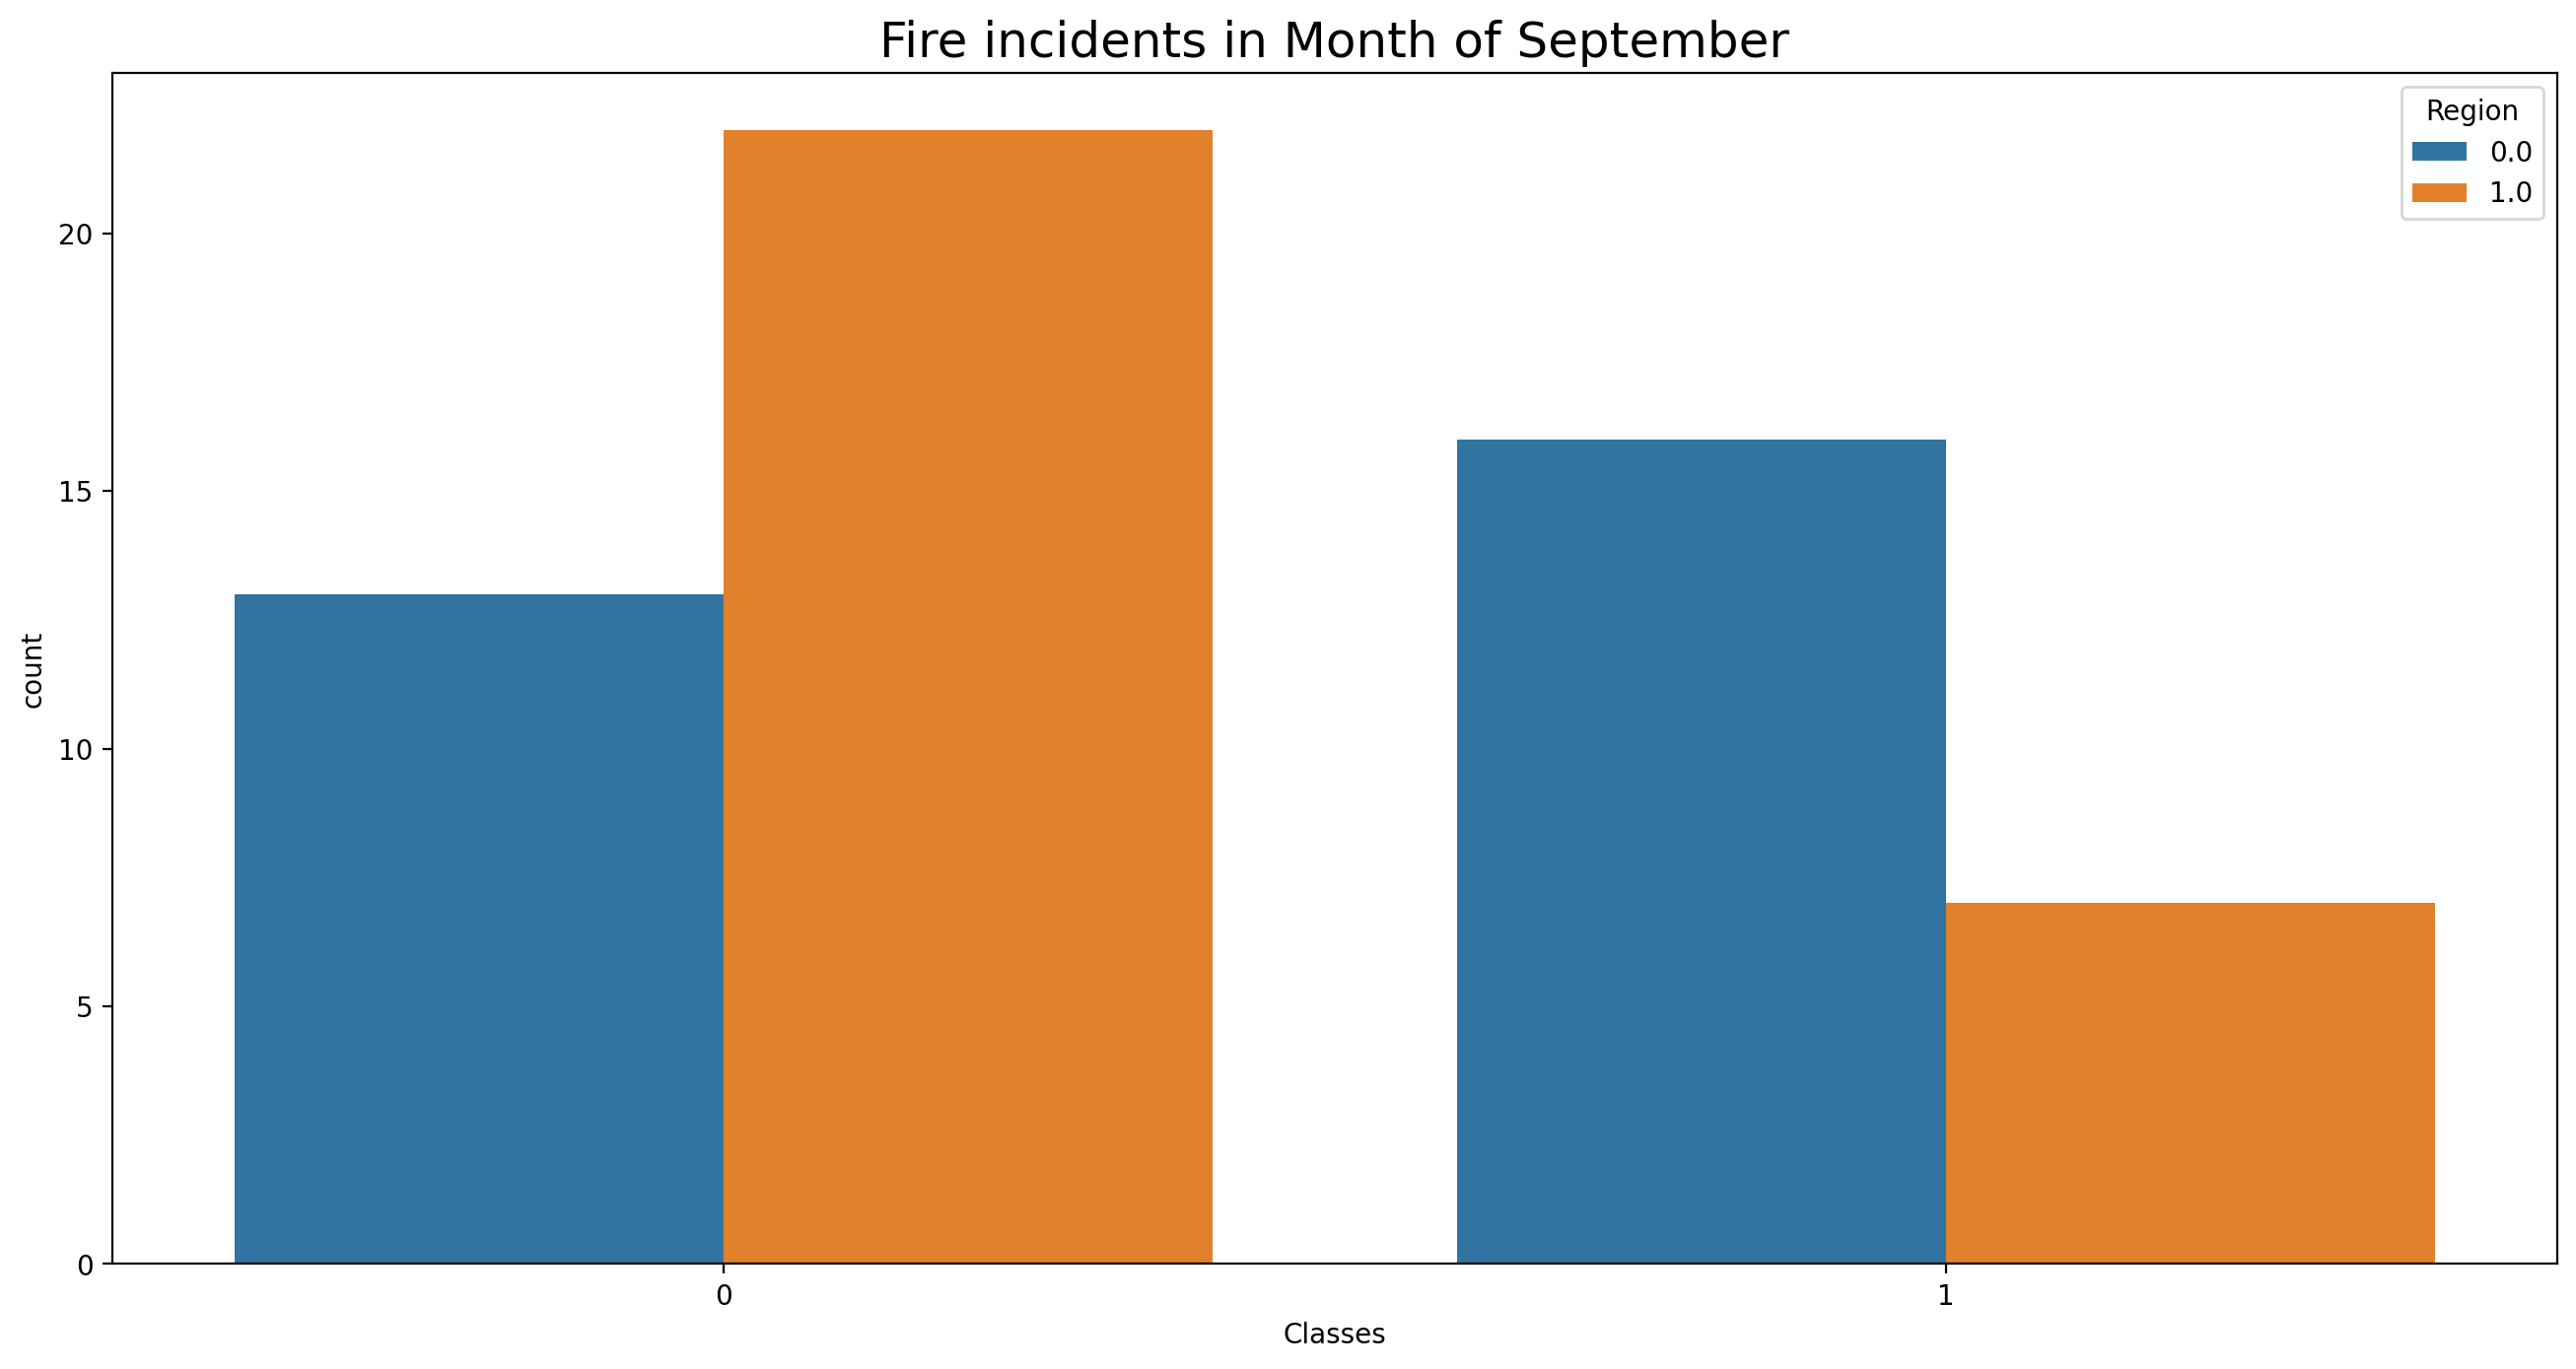

In [329]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Fire incidents in Month of September', fontsize=18)
sns.countplot(x=sep_fire['Classes'], hue=df['Region'])

Observation:
- Since the Temperature was low for Region 1, it had fewer fire incidents.

## Fire Incidents for Region 0 Month wise

In [333]:
region_0 = df[df['Region'] == 0]

region_0.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date,FWI_hazard,FFMC_hazard
124,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,0.0,2012-06-01,Low,Low
125,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0,0.0,2012-06-02,Low,Low
126,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,0.0,2012-06-03,Low,Low
127,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,0.0,2012-06-04,Low,Moderate
128,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0,0.0,2012-06-05,Low,Moderate


<AxesSubplot:title={'center':'Fire incidents in Month of September'}, xlabel='Classes', ylabel='count'>

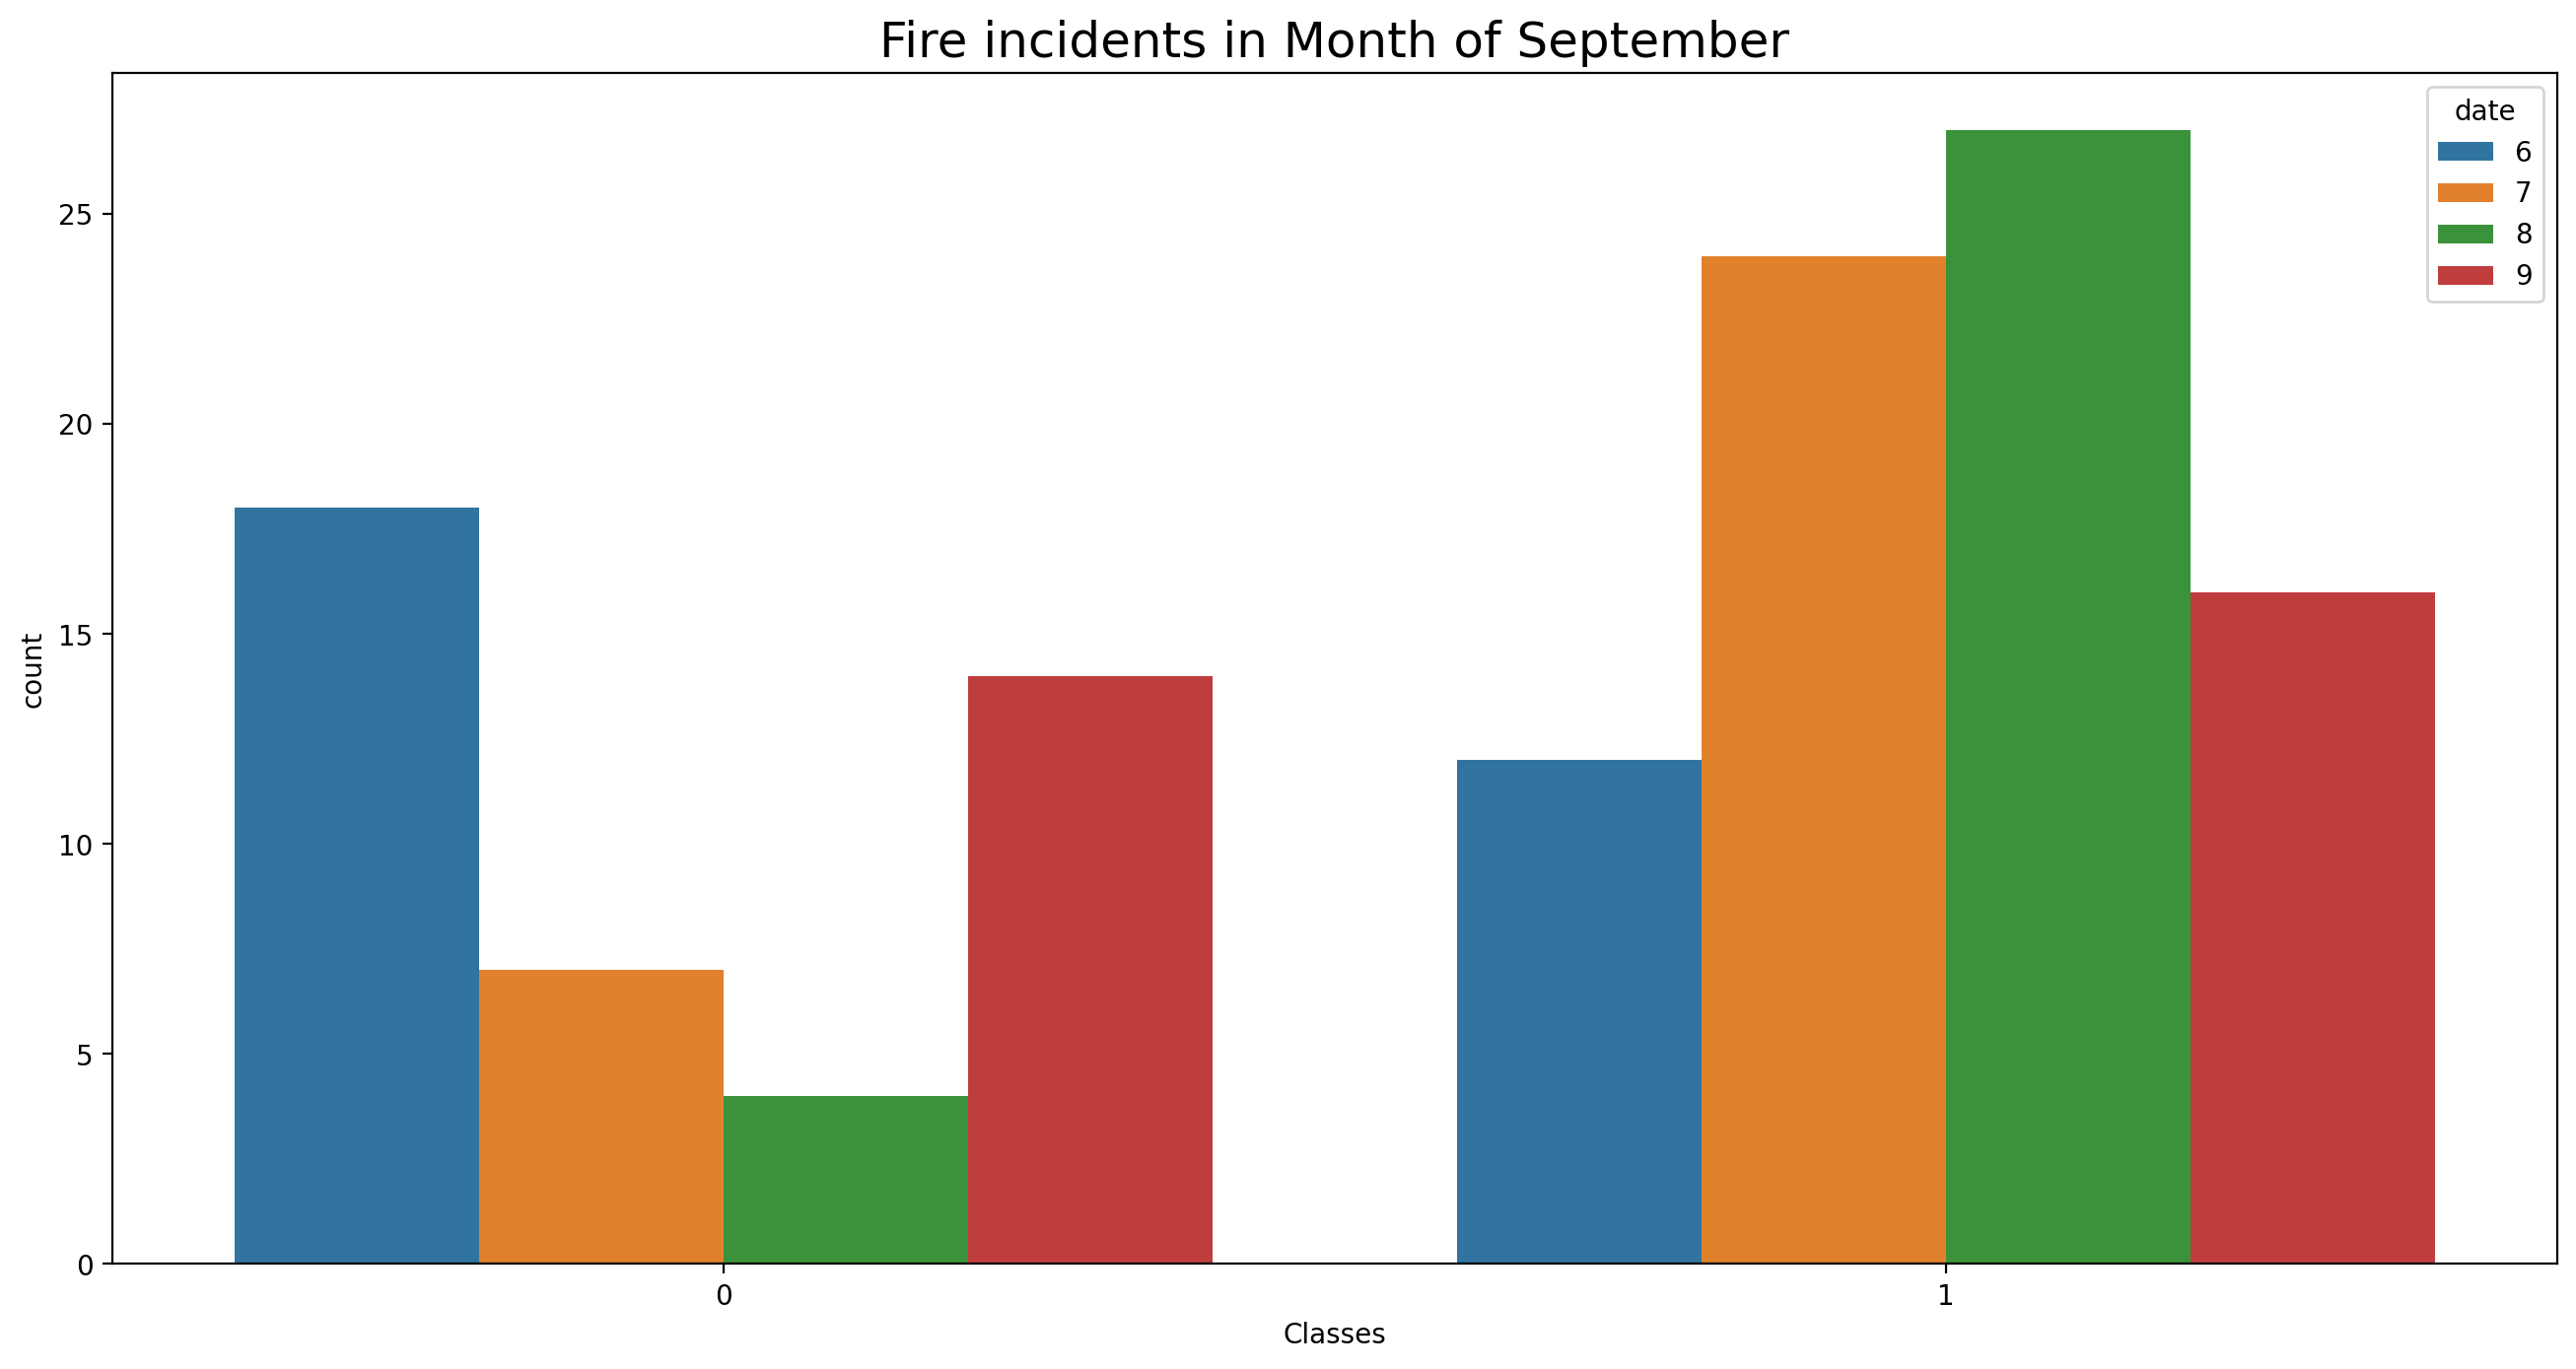

In [341]:


plt.figure(figsize=(16,8), dpi=200)
plt.title('Fire incidents in Month of September', fontsize=18)

sns.countplot(x=region_0['Classes'], hue=df['date'].dt.month)

- We know Temperature was almost similar in Month of __JUNE__ and __SEPTEMBER__, so the fire incidents(fire / no fire) are also very close.

## Fire Incidents for Region 0 Month wise

In [338]:
region_1 = df[df['Region'] == 1]

region_1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date,FWI_hazard,FFMC_hazard
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0,2012-06-01,Low,Low
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0,2012-06-02,Low,Low
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0,2012-06-03,Low,Low
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1.0,2012-06-04,Low,Low
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1.0,2012-06-05,Low,Low


<AxesSubplot:title={'center':'Fire incidents in Month wise for Region 1(Bejaia Region)'}, xlabel='Classes', ylabel='count'>

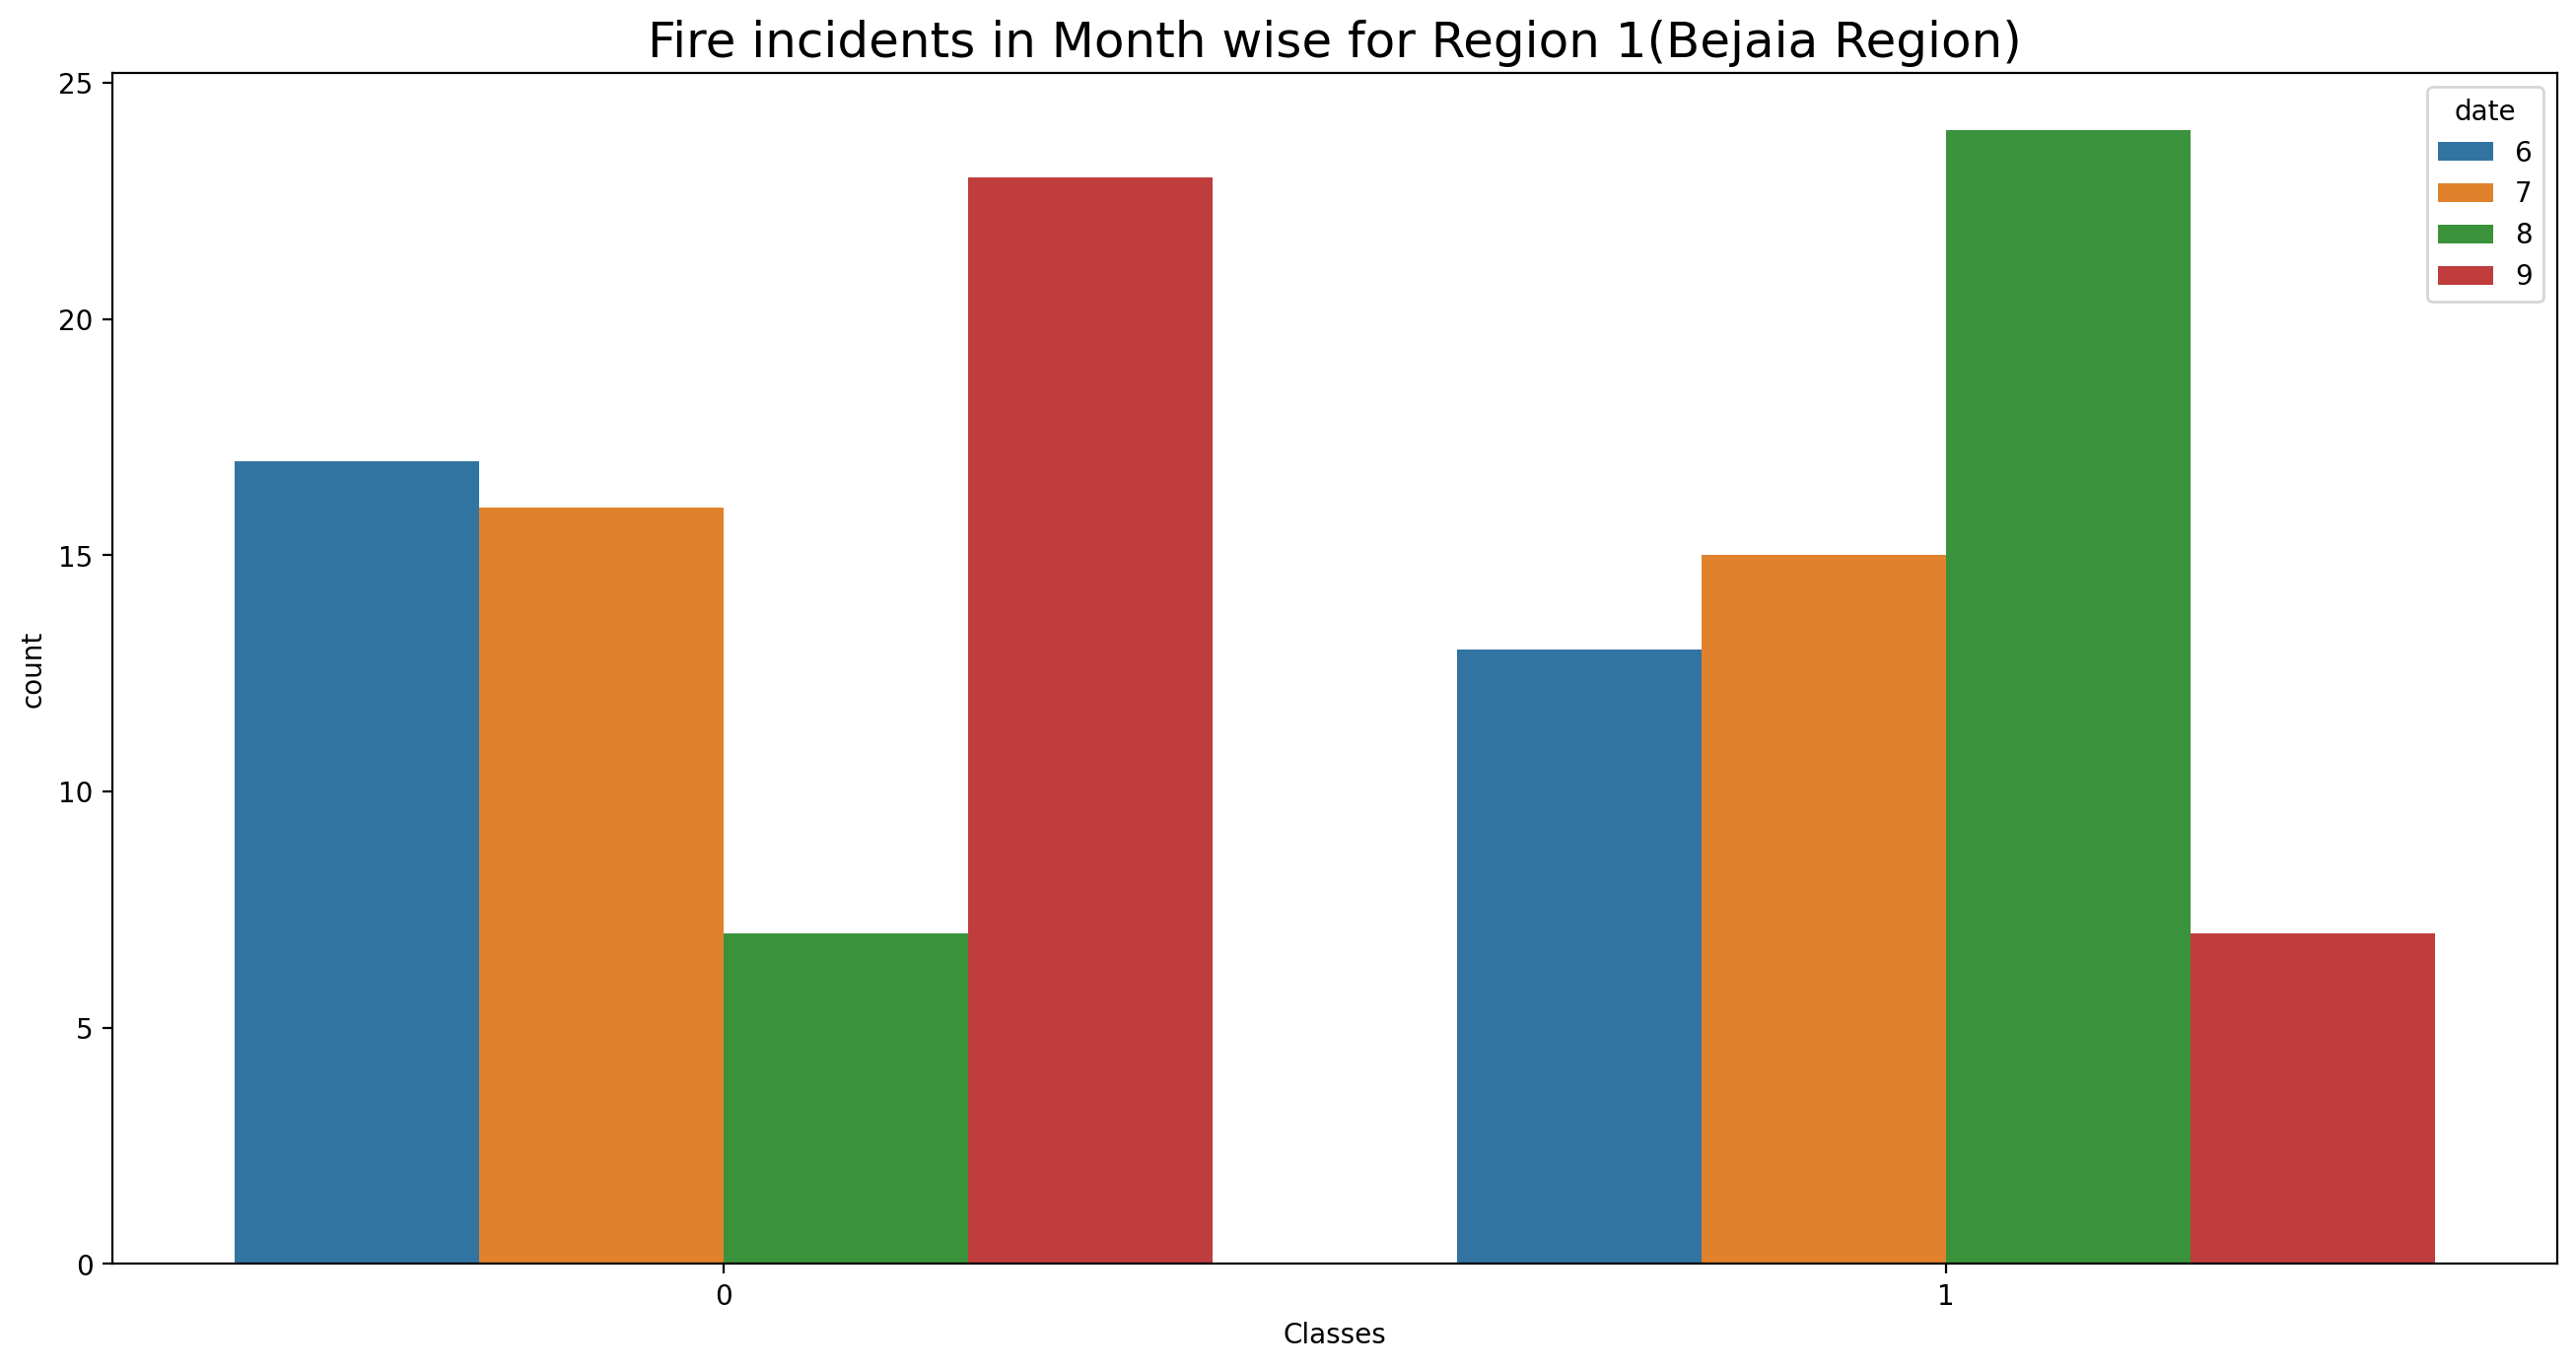

In [343]:


plt.figure(figsize=(16,8), dpi=200)
plt.title('Fire incidents in Month wise for Region 1(Bejaia Region)', fontsize=18)

sns.countplot(x=region_1['Classes'], hue=df['date'].dt.month)

In [347]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date,FWI_hazard,FFMC_hazard
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0,2012-06-01,Low,Low
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0,2012-06-02,Low,Low
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0,2012-06-03,Low,Low
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1.0,2012-06-04,Low,Low
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1.0,2012-06-05,Low,Low


In [358]:
fig = px.bar(data_frame=df, x='Temperature',y='Classes', color='FWI_hazard')


fig.show()